In [ ]:
"""
PP Objectives & Requirements 1 (OR1):

Data Inspection:
Assign the "Data" and "Data Dictionary" sheets of the Dataset 1 (D1) and Dataset 2 (D2) to variables.
Use the head() function and the print() function to inspect the contents of the D1 and D2 data.
Use the head() function and the print() function to inspect the contents of the D1 and D2 data dictionaries.
Use the .columns attribute to create a list of column names for your D1 data.
Use the data dictionary of your D1 to determine what the column names in your D1 data represent.

Data Processing:
Transpose the D1 data dictionary to provide an alternative view of the entire contents to ensure understanding of what it reveals about the D1 data.
Merge your D1 and D2 datasets on the "ID" column.
Create a list of column names to rename your D1 original column names and apply it using the rename() function.
Transform your "Age" variable from a float data type to a int data type (int64 is fine). 

Data Engineering:
Write your merged D1 and D2 data to a new xlsx file.
Create a new dataframe consisting of Age and Date where the data is grouped by date and the mean age.

Data Analysis:
Use the describe() function to analyze the Age variable in D1.

Data Reporting: 
Report these statistics for the age of your client's target customers based on the Age variable in your client's D2 (Dataset 2): Minimum, Maximum, Average


Note: All teams are required to meet these OR1 in the final submission of their PP TCP.
"""

In [2]:
import pandas as pd # For data processing
import numpy as np # For linear algebra
import matplotlib.pyplot as plt # For plotting
import piplite # For using a wrapper to install any need packages
await piplite.install("openpyxl") # For installing "openpyxl" inside of a wrapper to be able to work with XLSX files
await piplite.install("seaborn")
from wordcloud import WordCloud
import seaborn as sns

In [3]:
# Data Inspection:
# Assign the "Data" and "Data Dictionary" sheets of the Dataset 1 (D1) and Dataset 2 (D2) to variables.
college_hangout_d1_data = pd.read_excel("/drive/J-Virtual College Hangout-D1.xlsx", sheet_name="Data")
college_hangout_d1_data_dict = pd.read_excel("/drive/J-Virtual College Hangout-D1.xlsx", sheet_name="Data Dictionary")

college_hangout_d2_data = pd.read_excel("/drive/J-Virtual College Hangout-D2.xlsx", sheet_name="Data")
college_hangout_d2_data_dict = pd.read_excel("/drive/J-Virtual College Hangout-D2.xlsx", sheet_name="Data Dictionary")

In [4]:
# Use the head() function and the print() function to inspect the contents of the D1 and D2 data.
print("College Hangout D1 Data Preview:")
print(college_hangout_d1_data.head())
print("\nCollege Hangout D2 Data Preview:")
print(college_hangout_d2_data.head())

College Hangout D1 Data Preview:
   ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7
0   1   2  20   1   3   3   8   1
1   2   2  24   1   3   4   2   2
2   3   2  19   1  10   2   6   1
3   4   2  21   1   3   3   6   2
4   5   2  19   1  10   2   2   1

College Hangout D2 Data Preview:
   ID       Date
0   1 2022-04-20
1   2 2022-07-19
2   3 2022-06-11
3   4 2022-05-25
4   5 2022-06-08


In [5]:
# Use the head() function and the print() function to inspect the contents of the D1 and D2 data dictionaries.
print("\nCollege Hangout D1 Data Dictionary Preview:")
print(college_hangout_d1_data_dict.head())
print("--------------------------------------------------")
print("\nCollege Hangout D2 Data Dictionary Preview:")
print(college_hangout_d2_data_dict.head())


College Hangout D1 Data Dictionary Preview:
   ID                           ResponseID           Unnamed: 2  \
0  Q1                 What is your Gender?             Male (1)   
1  Q2                    What is your age?       (text entered)   
2  Q3         What is your marital status?           Single (1)   
3  Q4              What is your ethnicity?  Ameridan Indian (1)   
4  Q5  What is your current college level?         Freshman (1)   

             Unnamed: 3            Unnamed: 4          Unnamed: 5  \
0            Female (2)                   NaN                 NaN   
1                   NaN                   NaN                 NaN   
2           Married (2)          Divorced (3)         Widowed (4)   
3  African American (2)  Mexican American (3)  Other Hispanic (4)   
4         Sophomore (2)            Junior (3)          Senior (4)   

     Unnamed: 6           Unnamed: 7            Unnamed: 8    Unnamed: 9  \
0           NaN                  NaN                   NaN   

In [6]:
# Use the .columns attribute to create a list of column names for your D1 data.
college_hangout_d1_columns = college_hangout_d1_data.columns.tolist()
print("List of D1 Column Names:")
print(college_hangout_d1_columns)

List of D1 Column Names:
['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']


In [7]:
# Use the data dictionary of your D1 to determine what the column names in your D1 data represent.
print("\nInterpretation of College Hangout D1 Column Names:")
for index, row in college_hangout_d1_data_dict.iterrows():
    print(f"{row['ID']}: {row['ResponseID']}")


Interpretation of College Hangout D1 Column Names:
Q1: What is your Gender?
Q2: What is your age?
Q3: What is your marital status?
Q4: What is your ethnicity?
Q5: What is your current college level?
Q6: What college does your major belong to?
Q7: What is your monthly income?


In [8]:
# Data Processing:
# Transpose the D1 data dictionary to provide an alternative view of the entire contents to ensure understanding of what it reveals about the D1 data.
college_hangout_d1_data_dict_transposed = college_hangout_d1_data_dict.T
college_hangout_d1_data_dict

,ID,ResponseID,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Q1,What is your Gender?,Male (1),Female (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q2,What is your age?,(text entered),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q3,What is your marital status?,Single (1),Married (2),Divorced (3),Widowed (4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q4,What is your ethnicity?,Ameridan Indian (1),African American (2),Mexican American (3),Other Hispanic (4),Asian (5),Southeast Asian (6),Pacific Islander (7),Filipino (8),Multiple Ethnicities (9),White (10),Other/Not Stated (11),International (12)
4,Q5,What is your current college level?,Freshman (1),Sophomore (2),Junior (3),Senior (4),Graduate (5),NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Q6,What college does your major belong to?,Arts & Letters (1),Business (2),Education (3),Engineering (4),Health & Human Services (5),Professional Studies & Fine Arts (6),Sciences (7),Undergraduate Studies (8),Graduate Studies (9),NaN,NaN,NaN
6,Q7,What is your monthly income?,$499 or less (1),$500 to $999 (2),"$1,000 to $1,499 (3)","$1,500 to $1,999 (4)","$2,000 or more (5)",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Merge your D1 and D2 datasets on the "ID" column.
merged_data_D1_D2 = pd.merge(college_hangout_d1_data, college_hangout_d2_data, on="ID")

In [10]:
# Create a list of column names to rename your D1 original column names and apply it using the rename() function.
new_column_names = {
    'ID': 'ID',
    'Q1': 'Gender',
    'Q2': 'Age',
    'Q3': 'MaritalStatus',
    'Q4': 'Ethnicity',
    'Q5': 'CollegeLevel',
    'Q6': 'CollegeMajor',
    'Q7': 'MontlyIncome'  
}
college_hangout_merged_data_renamed = merged_data_D1_D2.rename(columns=new_column_names)

In [11]:
# Transform your "Age" variable from a float data type to a int data type (int64 is fine). 
college_hangout_merged_data_renamed['Age'] = college_hangout_merged_data_renamed['Age'].astype('int64')
print(college_hangout_merged_data_renamed.dtypes)


ID                        int64
Gender                    int64
Age                       int64
MaritalStatus             int64
Ethnicity                 int64
CollegeLevel              int64
CollegeMajor              int64
MontlyIncome              int64
Date             datetime64[ns]
dtype: object


In [12]:
# Data Engineering:
# Write your merged D1 and D2 data to a new xlsx file.
college_hangout_merged_data_renamed.to_excel("/drive/merged_D1_D2_data.xlsx", index=False)

In [13]:
# Create a new dataframe consisting of Age and Date where the data is grouped by date and the mean age.
college_hangout_age_date_grouped = college_hangout_merged_data_renamed.groupby('Date', as_index=False)['Age'].mean()
college_hangout_age_date_grouped.head()

,Date,Age
0,2022-01-02,29.0
1,2022-01-04,20.0
2,2022-01-05,19.0
3,2022-01-09,21.0
4,2022-01-13,29.0


In [14]:
# Data Analysis:
# Use the describe() function to analyze the Age variable in D1.
age_analysis_d1 = college_hangout_d1_data['Q2'].describe()
print("Age Analysis in D1:")
print(age_analysis_d1)


Age Analysis in D1:
count    183.000000
mean      22.295082
std        5.110894
min       17.000000
25%       19.000000
50%       21.000000
75%       22.500000
max       47.000000
Name: Q2, dtype: float64


In [15]:
# Data Reporting: 
# Report these statistics for the age of your client's target customers based on the Age variable in your client's D2 (Dataset 2): Minimum, Maximum, Average
print("\nAge Statistics in Merged Dataset (D1 & D2):")
print("Minimum Age:", college_hangout_merged_data_renamed['Age'].min())
print("Maximum Age:", college_hangout_merged_data_renamed['Age'].max())
print("Average Age:", college_hangout_merged_data_renamed['Age'].mean() )


Age Statistics in Merged Dataset (D1 & D2):
Minimum Age: 17
Maximum Age: 47
Average Age: 22.295081967213115


In [16]:
# Space intentionally blank to separate sections.

In [17]:
"""
PP Objectives & Requirements 2 (OR2):

Data Inspection:
Assign the "Data" and "Data Dictionary" sheets of the Dataset 3 (D3) to variables.
Use the head() function and the print() function to inspect the contents of the D3 data.
Use the head() function and the print() function to inspect the contents of the D3 data dictionary.
Use the .columns attribute to create a list of column names for your D3 data.
Use the data dictionary of your D3 to determine what the column names in your D3 data represent.
Change the text display options so that you can see the entire questions of the D3 variables using the pandas set_option() function.

Data Processing:
Transpose the D3 data dictionary to provide an alternative view of the entire contents to ensure understanding of what it reveals about the D3 data. Use whatever view makes more sense to your team.
Merge your D1_D2 and D3 datasets on the "ID" column.
Create a list of column names to rename your D3 original column names and apply it using the rename() function. Be sure to be very careful, thorough, and precise during this step.
Use the map() function to assign the ethnicity numeric codes that are used in D1_data to the ethnicity labels that they are defined as representing in the D1_DD. Hint: See "Python Code Helper #3.ipynb" file on Bb.

Data Engineering:
Write your merged D1_D2 and D3 data to a new xlsx file.
Create a frequency table of the Ethnicity variable using the value_counts() function.
Create an ethnicity_counts variable.
Create a list of the ethnicity labels in the order (very important) that you see them listed in the your frequency table. Hint: Only include the ones that are showing in your frequency table; See "Python Code Helper #3.ipynb" file on Bb.
Create an "explode" variable to use in plotting.

Data Analysis:
Make a pie chart for showing the data composition of your Ethnicity variable.

Data Reporting: 
Based on your pie chart, answer these questions: What is the predominant ethnicity of your client's target customers? What is the second-largest ethnicity of your client's target customers? What ethnicity category comprises the smallest number of your client's target customers?


Note: All teams are required to meet these OR2 in the final submission of their PP TCP.
"""

'\nPP Objectives & Requirements 2 (OR2):\n\nData Inspection:\nAssign the "Data" and "Data Dictionary" sheets of the Dataset 3 (D3) to variables.\nUse the head() function and the print() function to inspect the contents of the D3 data.\nUse the head() function and the print() function to inspect the contents of the D3 data dictionary.\nUse the .columns attribute to create a list of column names for your D3 data.\nUse the data dictionary of your D3 to determine what the column names in your D3 data represent.\nChange the text display options so that you can see the entire questions of the D3 variables using the pandas set_option() function.\n\nData Processing:\nTranspose the D3 data dictionary to provide an alternative view of the entire contents to ensure understanding of what it reveals about the D3 data. Use whatever view makes more sense to your team.\nMerge your D1_D2 and D3 datasets on the "ID" column.\nCreate a list of column names to rename your D3 original column names and apply

In [19]:
# Data Inspection:
# Assign the "Data" and "Data Dictionary" sheets of the Dataset 3 (D3) to variables.
file_path = '/drive/J-Virtual College Hangout-D3.xlsx'  # Update this path to your actual file location
college_hangout_data_d3 = pd.read_excel(file_path, sheet_name='Data')
college_hangout_data_dictionary_d3 = pd.read_excel(file_path, sheet_name='Data Dictionary')

In [20]:
# Use the head() function and the print() function to inspect the contents of the D3 data.
print("College Hangout Data (D3):")
print(college_hangout_data_d3.head())

College Hangout Data (D3):
   ID  Q8  Q9  Q10  Q11  Q12  Q13
0   1   1   2    2    0    3    2
1   2   1   2    2    1    2    3
2   3   1   1    3    1    2    2
3   4   2   2    2    1    2    4
4   5   1   0    3    0    1    2


In [21]:
# Use the head() function and the print() function to inspect the contents of the D3 data dictionary.
print("College Hangout Dictionary (D3) Preview:")
print(college_hangout_data_dictionary_d3.head())

College Hangout Dictionary (D3) Preview:
    ID                                         ResponseID  \
0   Q8  I would like to see a new Virtual College Hang...   
1   Q9  I would join a new Virutal College Hangout for...   
2  Q10  How often would you visit a Virtual College Ha...   
3  Q11  How interested would you be in subscribing to ...   
4  Q12  How often would you like to receive informatio...   

               Unnamed: 2                     Unnamed: 3        Unnamed: 4  \
0  Strongly disagree (-2)                  Disagree (-1)        Unsure (0)   
1  Strongly disagree (-2)                  Disagree (-1)        Unsure (0)   
2               Never (0)  A couple of times per day (1)  Once per day (2)   
3  Very uninterested (-2)              Uninterested (-1)        Unsure (0)   
4               Never (0)                    Monthly (1)        Weekly (2)   

          Unnamed: 5           Unnamed: 6         Unnamed: 7  
0          Agree (1)   Strongly agree (1)                NaN

In [22]:
# Use the .columns attribute to create a list of column names for your D3 data.
column_names_d3 = college_hangout_data_d3.columns
print("College Hangout Column Names in D3 Data:")
print(column_names_d3)

College Hangout Column Names in D3 Data:
Index(['ID', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13'], dtype='object')


In [23]:
# Use the data dictionary of your D3 to determine what the column names in your D3 data represent.
print("Interpretation of College Hangout D3 Column Names:")
for index, row in college_hangout_data_dictionary_d3.iterrows():
    print(f"{row['ID']}: {row['ResponseID']}")


Interpretation of College Hangout D3 Column Names:
Q8: I would like to see a new Virtual College Hangout for my specific college.
Q9: I would join a new Virutal College Hangout for my specific college.
Q10: How often would you visit a Virtual College Hangout for your specific college?
Q11: How interested would you be in subscribing to information and event notifications for a Virtual College Hangout for your specific college?
Q12: How often would you like to receive information and event notifications for a Virtual College Hangout for your specific college?
Q13: How many hours do you spend online per day?


In [24]:
# Change the text display options so that you can see the entire questions of the D3 variables using the pandas set_option() function.
pd.set_option('display.max_colwidth', None)


In [25]:
# Data Processing:
# Transpose the D3 data dictionary to provide an alternative view of the entire contents to ensure understanding of what it reveals about the D3 data. Use whatever view makes more sense to your team.
college_hangout_data_dictionary_d3_transposed = college_hangout_data_dictionary_d3.T
college_hangout_data_dictionary_d3_transposed

,0,1,2,3,4,5
ID,Q8,Q9,Q10,Q11,Q12,Q13
ResponseID,I would like to see a new Virtual College Hangout for my specific college.,I would join a new Virutal College Hangout for my specific college.,How often would you visit a Virtual College Hangout for your specific college?,How interested would you be in subscribing to information and event notifications for a Virtual College Hangout for your specific college?,How often would you like to receive information and event notifications for a Virtual College Hangout for your specific college?,How many hours do you spend online per day?
Unnamed: 2,Strongly disagree (-2),Strongly disagree (-2),Never (0),Very uninterested (-2),Never (0),None (0)
Unnamed: 3,Disagree (-1),Disagree (-1),A couple of times per day (1),Uninterested (-1),Monthly (1),Less than one hour (1)
Unnamed: 4,Unsure (0),Unsure (0),Once per day (2),Unsure (0),Weekly (2),1 to almost 3 hours (2)
Unnamed: 5,Agree (1),Agree (1),Once per week (3),Interested (1),Daily (3),3 to almost 5 hours (4)
Unnamed: 6,Strongly agree (1),Strongly agree (1),Once per month (4),Very interested (2),NaN,7 to almost 9 hours (5)
Unnamed: 7,NaN,NaN,Once per year (5),NaN,NaN,9 or more hours (6)


In [26]:
# Merge your D1_D2 and D3 datasets on the "ID" column.
merged_data = pd.merge(college_hangout_merged_data_renamed, college_hangout_data_d3, on="ID")
print(merged_data.head())

   ID  Gender  Age  MaritalStatus  Ethnicity  CollegeLevel  CollegeMajor  \
0   1       2   20              1          3             3             8   
1   2       2   24              1          3             4             2   
2   3       2   19              1         10             2             6   
3   4       2   21              1          3             3             6   
4   5       2   19              1         10             2             2   

   MontlyIncome       Date  Q8  Q9  Q10  Q11  Q12  Q13  
0             1 2022-04-20   1   2    2    0    3    2  
1             2 2022-07-19   1   2    2    1    2    3  
2             1 2022-06-11   1   1    3    1    2    2  
3             2 2022-05-25   2   2    2    1    2    4  
4             1 2022-06-08   1   0    3    0    1    2  


In [27]:
# Create a list of column names to rename your D3 original column names and apply it using the rename() function. Be sure to be very careful, thorough, and precise during this step.
new_column_names = {
    'Q8': 'Interest_in_Virtual_College_Hangout',
    'Q9': 'Willingness_to_Join',
    'Q10' : 'Visit_Frequency_Hangout',
    'Q11': 'Interest_in_Subscription',
    'Q12': 'Notification_Frequency',
    'Q13':'Online_Hours_Per_Day'
}

# Rename columns in D3 using the rename() function
college_hangout_data_d3_renamed = college_hangout_data_d3.rename(columns=new_column_names)
college_hangout_data_d3_renamed.head()

,ID,Interest_in_Virtual_College_Hangout,Willingness_to_Join,Visit_Frequency_Hangout,Interest_in_Subscription,Notification_Frequency,Online_Hours_Per_Day
0,1,1,2,2,0,3,2
1,2,1,2,2,1,2,3
2,3,1,1,3,1,2,2
3,4,2,2,2,1,2,4
4,5,1,0,3,0,1,2


In [28]:
# Use the map() function to assign the ethnicity numeric codes that are used in D1_data to the ethnicity labels that they are defined as representing in the D1_DD. Hint: See "Python Code Helper #3.ipynb" file on Bb.
college_hangout_merged_data_renamed['Ethnicity'] = college_hangout_merged_data_renamed['Ethnicity'].map({1:'Ameridan Indian', 2:'African American', 3:'Mexican American', 4:'Other Hispanic', 5:'Asian', 6:'Southeast Asian', 7:'Pacific Islander', 8:'Filipino', 9:'Multiple Ethnicities', 10:'White', 11:'Other/Not Stated', 12:'International'})
college_hangout_merged_data_renamed['Ethnicity'].value_counts()

White                   93
Mexican American        35
Filipino                15
Asian                   12
Multiple Ethnicities     9
Other Hispanic           7
Other/Not Stated         5
African American         2
International            2
Pacific Islander         2
Ameridan Indian          1
Name: Ethnicity, dtype: int64

In [29]:
# Data Engineering:
# Write your merged D1_D2 and D3 data to a new xlsx file.
merged_data.to_excel('/drive/merged_dataset_D1_D2_D3.xlsx', index=False)

In [30]:
# Create a frequency table of the Ethnicity variable using the value_counts() function.
print(college_hangout_merged_data_renamed['Ethnicity'].value_counts())

White                   93
Mexican American        35
Filipino                15
Asian                   12
Multiple Ethnicities     9
Other Hispanic           7
Other/Not Stated         5
African American         2
International            2
Pacific Islander         2
Ameridan Indian          1
Name: Ethnicity, dtype: int64


In [31]:
# Create an ethnicity_counts variable.
ethnicity_counts = college_hangout_merged_data_renamed['Ethnicity'].value_counts()
ethnicity_counts

White                   93
Mexican American        35
Filipino                15
Asian                   12
Multiple Ethnicities     9
Other Hispanic           7
Other/Not Stated         5
African American         2
International            2
Pacific Islander         2
Ameridan Indian          1
Name: Ethnicity, dtype: int64

In [32]:
# Create a list of the ethnicity labels in the order (very important) that you see them listed in the your frequency table. Hint: Only include the ones that are showing in your frequency table; See "Python Code Helper #3.ipynb" file on Bb.
ethnicity_labels = ['White', 'Mexican American', 'Filipino', 'Asian', 'Multiple Ethnicities', 'Other Hispanic', 'Other/Not Stated', 'African American', 'International', 'Pacific Islander','Ameridan Indian']


In [33]:
# Create an "explode" variable to use in plotting.
explode = [0, 0, 0, 0, 0.2, 0.2, 0.2, 0, 0.2, 0.2,0.2]

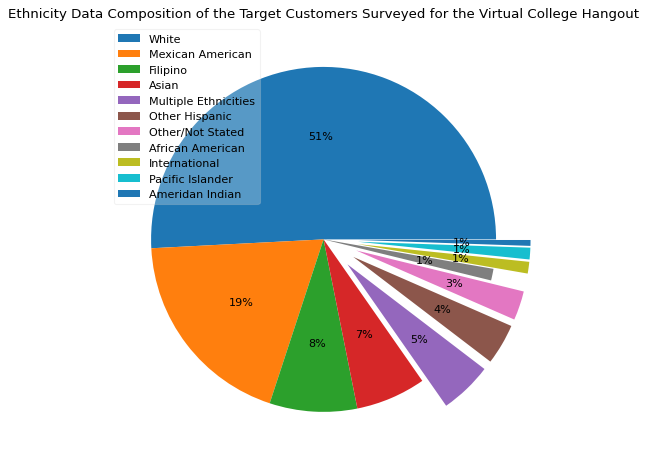

In [34]:
# Data Analysis:
# Make a pie chart for showing the data composition of your Ethnicity variable.
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
plt.pie(ethnicity_counts, autopct='%.0f%%', explode=explode) # Add your ethnicity_counts variable that you feature-engineered; ensure it shows percentages; ensure that it uses your explode variable.
plt.title("Ethnicity Data Composition of the Target Customers Surveyed for the Virtual College Hangout")
plt.legend(ethnicity_labels, loc='upper left', framealpha=0.25) 
plt.show()

In [35]:
# Data Reporting: 
# Based on your pie chart, answer these questions: What is the predominant ethnicity of your client's target customers? What is the second-largest ethnicity of your client's target customers? What ethnicity category comprises the smallest number of your client's target customers?


# The predominant ethnicity of your client's target customers is White, comprising 51% of the total.
# The second-largest ethnicity of your client's target customers is African American, making up 19% of the total.
# The ethnicity category that comprises the smallest number of your client's target customers is tied between American Indian, Pacific Islander, African American and International, each representing 1% of the total.

In [36]:
# Space intentionally blank to separate sections.

In [37]:
"""
PP Objectives & Requirements 3 (OR3):

Data Inspection:
Continue to inspect the contents of your merged D1_D2_D3 dataset to see what variables are available for use in your PP TCP use case.

Data Processing:
Use the map() function to assign the education level numeric codes that are used in D1_data to the education level labels that they are defined as representing in the D1_DD. (Hint: Based on education classification; e.g., freshman.)
Use the map() function to assign the educational interest area numeric codes that are used in D1_data to the educational interest area labels that they are defined as representing in the D1_DD. (Hint: Based on college major; e.g., Business.) NOTE: If your assigned use case does not have an educational interest area variable, use a variable of your team's choice from your D3 dataset for this requirement.

Data Engineering:
Create a frequency table of the education level variable using the value_counts() function or some other method. (Hint: Based on education classification; e.g., freshman.)
Create a frequency table of the educational interest area variable using the value_counts() function or some other method. (Hint: Based on college major; e.g., Business.)
Create an education_level_counts variable (or something similar).
Create an educational_interests_counts variable (or something similar such as major_counts). NOTE: If your assigned use case does not have an educational interest area variable, use the variable that your team's chose from your D3 dataset for this requirement.

Data Analysis:
Make a pie, donut, or bar chart for showing the data composition of your education level variable. (Feel free to ask Dr. Mead to make a code helper file for this.)
Make a pie, donut, or bar chart for showing the data composition of your educational interest area variable. (Feel free to ask Dr. Mead to make a code helper file for this.) NOTE: If your assigned use case does not have an educational interest area variable, use the variable that your team's chose from your D3 dataset for this requirement.

Data Reporting:
Based on your analyses, answer these questions:
What is the predominant education level of your client's target customers (based on education classification; e.g., freshman?)
What is the predominant educational interest area of your client's target customers (based on college major?)
If your assigned use case does not have an educational interest area variable, use the variable that your team's chose from your D3 dataset for this "predominance" requirement.


Note: All teams are required to meet these OR3 in the final submission of their PP TCP.
"""

'\nPP Objectives & Requirements 3 (OR3):\n\nData Inspection:\nContinue to inspect the contents of your merged D1_D2_D3 dataset to see what variables are available for use in your PP TCP use case.\n\nData Processing:\nUse the map() function to assign the education level numeric codes that are used in D1_data to the education level labels that they are defined as representing in the D1_DD. (Hint: Based on education classification; e.g., freshman.)\nUse the map() function to assign the educational interest area numeric codes that are used in D1_data to the educational interest area labels that they are defined as representing in the D1_DD. (Hint: Based on college major; e.g., Business.) NOTE: If your assigned use case does not have an educational interest area variable, use a variable of your team\'s choice from your D3 dataset for this requirement.\n\nData Engineering:\nCreate a frequency table of the education level variable using the value_counts() function or some other method. (Hint:

In [39]:
# Data Inspection:
# Continue to inspect the contents of your merged D1_D2_D3 dataset to see what variables are available for use in your PP TCP use case.
merged_data_D1_D2_D3 = pd.read_excel('/drive/merged_dataset_D1_D2_D3.xlsx')# Load the merged dataset for inspection
print(merged_data_D1_D2_D3.head()) # Display the first few rows of the dataset to inspect the variables
print(merged_data_D1_D2_D3.columns.tolist()) # List the available columns in the dataset

   ID  Gender  Age  MaritalStatus  Ethnicity  CollegeLevel  CollegeMajor  \
0   1       2   20              1          3             3             8   
1   2       2   24              1          3             4             2   
2   3       2   19              1         10             2             6   
3   4       2   21              1          3             3             6   
4   5       2   19              1         10             2             2   

   MontlyIncome       Date  Q8  Q9  Q10  Q11  Q12  Q13  
0             1 2022-04-20   1   2    2    0    3    2  
1             2 2022-07-19   1   2    2    1    2    3  
2             1 2022-06-11   1   1    3    1    2    2  
3             2 2022-05-25   2   2    2    1    2    4  
4             1 2022-06-08   1   0    3    0    1    2  
['ID', 'Gender', 'Age', 'MaritalStatus', 'Ethnicity', 'CollegeLevel', 'CollegeMajor', 'MontlyIncome', 'Date', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13']


In [40]:
# Data Processing:
# Use the map() function to assign the education level numeric codes that are used in D1_data to the education level labels that they are defined as representing in the D1_DD. (Hint: Based on education classification; e.g., freshman.)
merged_data_D1_D2_D3['CollegeLevel'] = merged_data_D1_D2_D3['CollegeLevel'].map({1:'Freshman', 2:'Sophomore', 3:'Junior', 4:'Senior', 5:'Graduate'})
merged_data_D1_D2_D3.head()

,ID,Gender,Age,MaritalStatus,Ethnicity,CollegeLevel,CollegeMajor,MontlyIncome,Date,Q8,Q9,Q10,Q11,Q12,Q13
0,1,2,20,1,3,Junior,8,1,2022-04-20,1,2,2,0,3,2
1,2,2,24,1,3,Senior,2,2,2022-07-19,1,2,2,1,2,3
2,3,2,19,1,10,Sophomore,6,1,2022-06-11,1,1,3,1,2,2
3,4,2,21,1,3,Junior,6,2,2022-05-25,2,2,2,1,2,4
4,5,2,19,1,10,Sophomore,2,1,2022-06-08,1,0,3,0,1,2


In [41]:
# Use the map() function to assign the educational interest area numeric codes that are used in D1_data to the educational interest area labels that they are defined as representing in the D1_DD. (Hint: Based on college major; e.g., Business.) NOTE: If your assigned use case does not have an educational interest area variable, use a variable of your team's choice from your D3 dataset for this requirement.
merged_data_D1_D2_D3['CollegeMajor'] = merged_data_D1_D2_D3['CollegeMajor'].map({1:'Arts & Letters', 2:'Business', 3:'Education', 4:'Engineering', 5:'Health & Human Services', 6:'Professional Studies & Fine Arts',7:'Sciences',8:'Undergraduate Studies',9:'Graduate Studies'})
merged_data_D1_D2_D3.head()

,ID,Gender,Age,MaritalStatus,Ethnicity,CollegeLevel,CollegeMajor,MontlyIncome,Date,Q8,Q9,Q10,Q11,Q12,Q13
0,1,2,20,1,3,Junior,Undergraduate Studies,1,2022-04-20,1,2,2,0,3,2
1,2,2,24,1,3,Senior,Business,2,2022-07-19,1,2,2,1,2,3
2,3,2,19,1,10,Sophomore,Professional Studies & Fine Arts,1,2022-06-11,1,1,3,1,2,2
3,4,2,21,1,3,Junior,Professional Studies & Fine Arts,2,2022-05-25,2,2,2,1,2,4
4,5,2,19,1,10,Sophomore,Business,1,2022-06-08,1,0,3,0,1,2


In [42]:
# Data Engineering:
# Create a frequency table of the education level variable using the value_counts() function or some other method. (Hint: Based on education classification; e.g., freshman.)
print(merged_data_D1_D2_D3['CollegeLevel'].value_counts())


Junior       71
Senior       58
Sophomore    40
Freshman     13
Graduate      1
Name: CollegeLevel, dtype: int64


In [43]:
# Create a frequency table of the educational interest area variable using the value_counts() function or some other method. (Hint: Based on college major; e.g., Business.)
print(merged_data_D1_D2_D3['CollegeMajor'].value_counts())


Business                            59
Professional Studies & Fine Arts    39
Sciences                            32
Arts & Letters                      20
Health & Human Services             14
Undergraduate Studies                9
Education                            6
Engineering                          4
Name: CollegeMajor, dtype: int64


In [44]:
# Create an education_level_counts variable (or something similar).
education_level_counts = merged_data_D1_D2_D3['CollegeLevel'].value_counts()
education_level_counts

Junior       71
Senior       58
Sophomore    40
Freshman     13
Graduate      1
Name: CollegeLevel, dtype: int64

In [45]:
# Create an educational_interests_counts variable (or something similar such as major_counts). NOTE: If your assigned use case does not have an educational interest area variable, use the variable that your team's chose from your D3 dataset for this requirement.
educational_interests_counts = merged_data_D1_D2_D3['CollegeMajor'].value_counts()
educational_interests_counts

Business                            59
Professional Studies & Fine Arts    39
Sciences                            32
Arts & Letters                      20
Health & Human Services             14
Undergraduate Studies                9
Education                            6
Engineering                          4
Name: CollegeMajor, dtype: int64

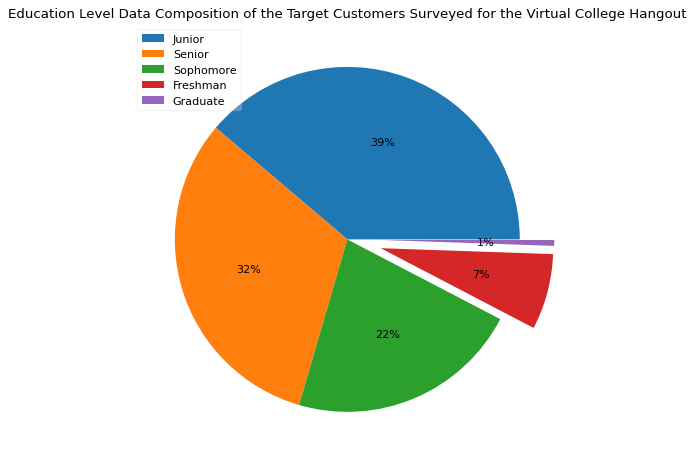

In [46]:
# Data Analysis:
# Make a pie, donut, or bar chart for showing the data composition of your education level variable. (Feel free to ask Dr. Mead to make a code helper file for this.)
explode = [0, 0, 0, 0.2, 0.2]
education_level_labels = ['Junior','Senior','Sophomore','Freshman','Graduate']
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
plt.pie(education_level_counts, autopct='%.0f%%', explode=explode) # Add your ethnicity_counts variable that you feature-engineered; ensure it shows percentages; ensure that it uses your explode variable.
plt.title("Education Level Data Composition of the Target Customers Surveyed for the Virtual College Hangout")
plt.legend(education_level_labels, loc='upper left', framealpha=0.25) 
plt.show()

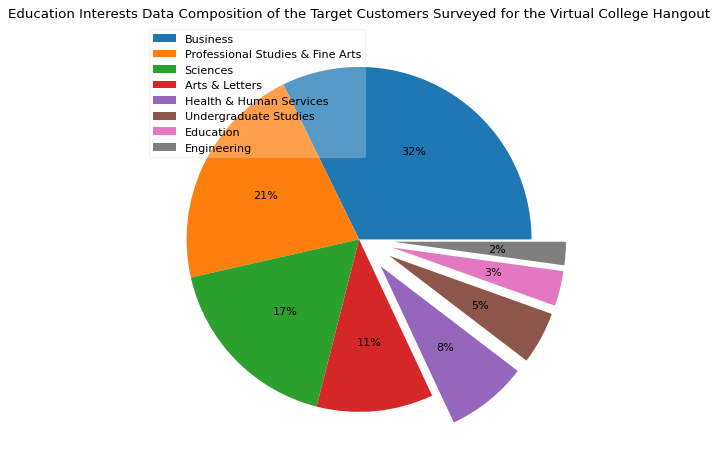

In [47]:
# Make a pie, donut, or bar chart for showing the data composition of your educational interest area variable. (Feel free to ask Dr. Mead to make a code helper file for this.) NOTE: If your assigned use case does not have an educational interest area variable, use the variable that your team's chose from your D3 dataset for this requirement.
explode = [0, 0, 0, 0, 0.2,0.2, 0.2, 0.2]
educational_interests_labels= ['Business','Professional Studies & Fine Arts','Sciences','Arts & Letters','Health & Human Services','Undergraduate Studies','Education','Engineering']
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
plt.pie(educational_interests_counts, autopct='%.0f%%', explode=explode) # Add your ethnicity_counts variable that you feature-engineered; ensure it shows percentages; ensure that it uses your explode variable.
plt.title("Education Interests Data Composition of the Target Customers Surveyed for the Virtual College Hangout")
plt.legend(educational_interests_labels, loc='upper left', framealpha=0.25) 
plt.show()


In [48]:

# Data Reporting:
# Based on your analyses, answer these questions:
# What is the predominant education level of your client's target customers (based on education classification; e.g., freshman?)
# What is the predominant educational interest area of your client's target customers (based on college major?)
# If your assigned use case does not have an educational interest area variable, use the variable that your team's chose from your D3 dataset for this "predominance" requirement.

# predominant education level of your client's target customers  -- Junior
# predominant educational interest area of your client's target customers -- Business

In [49]:
# Space intentionally blank to separate sections.

In [50]:
"""
PP Objectives & Requirements 4 (OR3):

Data Inspection:
Assign the "Data" and "Data Dictionary" sheets of the Dataset 4-1 (D4-1) to variables.
Use the head() function and the print() function to inspect the contents of the D4-1 data.
Use the head() function and the print() function to inspect the contents of the D4-1 data dictionary.
Use the .columns attribute to create a list of column names for your D4-1 data.
Use the data dictionary of your D4-1 to determine what the column names in your D4-1 data represent.
Change the text display options so that you can see the entire questions of the D4-1 variables using the pandas set_option() function.
Use the pandas library to inspect your D4-2 dataset. (Warning: You cannot merge D4-2 with your other use case datasets; read the documentation inside the D4-2 .ipynb file in the CS6 folder on Bb.)

Data Processing:
Merge your D1_D2_D3 and D4-1 datasets on the "ID" column.
Use Natural Language Processing techniques on your D4-2 dataset. (Hint: See CS6 course materials.)

Data Engineering:
Write your merged D1_D2_D3 and D4-1 data to a new xlsx file.

Data Analysis:
Make histograms, boxplots, and bubble charts of your media type usage variables (hint: D4-1 dataset).
Make a word cloud of your client's focus group text data (hint: D4-2 dataset and .ipynb file).

Data Reporting: 
Based on your analyses, answer these questions:
What is the average usage behavior of print media types among your client's target customers?
What is the average usage behavior of video media types among your client's target customers?
What is the average usage behavior of audio media types among your client's target customers?
What are the predominant attributes that your client's target customers want in the product or service that your use case is based on? (Hint: Use your analysis of your D4-2 dataset).


Note: All teams are required to meet these OR4 in the final submission of their PP TCP.
"""

'\nPP Objectives & Requirements 4 (OR3):\n\nData Inspection:\nAssign the "Data" and "Data Dictionary" sheets of the Dataset 4-1 (D4-1) to variables.\nUse the head() function and the print() function to inspect the contents of the D4-1 data.\nUse the head() function and the print() function to inspect the contents of the D4-1 data dictionary.\nUse the .columns attribute to create a list of column names for your D4-1 data.\nUse the data dictionary of your D4-1 to determine what the column names in your D4-1 data represent.\nChange the text display options so that you can see the entire questions of the D4-1 variables using the pandas set_option() function.\nUse the pandas library to inspect your D4-2 dataset. (Warning: You cannot merge D4-2 with your other use case datasets; read the documentation inside the D4-2 .ipynb file in the CS6 folder on Bb.)\n\nData Processing:\nMerge your D1_D2_D3 and D4-1 datasets on the "ID" column.\nUse Natural Language Processing techniques on your D4-2 dat

In [52]:
# Data Inspection:
# Assign the "Data" and "Data Dictionary" sheets of the Dataset 4-1 (D4-1) to variables.
d4_1_file_path = '/drive/J-Virtual College Hangout-D4-1.xlsx'
college_hangout_d4_1_data = pd.read_excel(d4_1_file_path, sheet_name='Data')
college_hangout_d4_1_data_dictionary = pd.read_excel(d4_1_file_path, sheet_name='Data Dictionary')

In [53]:
# Use the head() function and the print() function to inspect the contents of the D4-1 data.
print("College Hangout D4-1 Data:")
print(college_hangout_d4_1_data.head())

College Hangout D4-1 Data:
   ID  Q14  Q15  Q16  Q17
0   1    4    1    2    2
1   2    2    2    0    1
2   3    1    2    1    1
3   4    4    2    0    2
4   5    2    1    1    1


In [54]:
# Use the head() function and the print() function to inspect the contents of the D4-1 data dictionary.
print("College Hangout D4-1 Data Dictionary")
college_hangout_d4_1_data_dictionary.head()

College Hangout D4-1 Data Dictionary


,ID,ResponseID,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Q14,"How many hours of TV do you watch per day, including online?",None (0),Less than one hour (1),1 to almost 3 hours (2),3 to almost 5 hours (3),5 to almost 7 hours (4),7 to almost 9 hours (5),9 or more hours (6)
1,Q15,How many hours do you spend reading magazines (including online) per week?,None (0),Less than one hour (1),1 to almost 3 hours (2),3 to almost 5 hours (3),5 to almost 7 hours (4),7 to almost 9 hours (5),9 or more hours (6)
2,Q16,How many hours do you spend reading newspapers (including online) per week?,None (0),Less than one hour (1),1 to almost 3 hours (2),3 to almost 5 hours (3),5 to almost 7 hours (4),7 to almost 9 hours (5),9 or more hours (6)
3,Q17,How many hours of radio (including online) do you listen to per day?,None (0),Less than one hour (1),1 to almost 3 hours (2),3 to almost 5 hours (3),5 to almost 7 hours (4),7 to almost 9 hours (5),9 or more hours (6)


In [55]:
# Use the .columns attribute to create a list of column names for your D4-1 data.
d4_1_column_names = college_hangout_d4_1_data.columns.tolist()
print("College Hangout Column Names in D4-1 Data:")
print(d4_1_column_names)

College Hangout Column Names in D4-1 Data:
['ID', 'Q14', 'Q15', 'Q16', 'Q17']


In [56]:
# Use the data dictionary of your D4-1 to determine what the column names in your D4-1 data represent.
print("Interpretation of College Hangout D4-1 Column Names:")
for index, row in college_hangout_d4_1_data_dictionary.iterrows():
    print(f"{row['ID']}: {row['ResponseID']}")


Interpretation of College Hangout D4-1 Column Names:
Q14: How many hours of TV do you watch per day, including online?
Q15: How many hours do you spend reading magazines (including online) per week?
Q16: How many hours do you spend reading newspapers (including online) per week?
Q17: How many hours of radio (including online) do you listen to per day?


In [57]:
# Change the text display options so that you can see the entire questions of the D4-1 variables using the pandas set_option() function.
pd.set_option('display.max_colwidth', None)

In [58]:
# Use the pandas library to inspect your D4-2 dataset. (Warning: You cannot merge D4-2 with your other use case datasets; read the documentation inside the D4-2 .ipynb file in the CS6 folder on Bb.)
d4_2_file_path = '/drive/J-Virtual College Hangout-D4-2.xlsx'
college_hangout_d4_2_data = pd.read_excel(d4_2_file_path)
print(college_hangout_d4_2_data.head())

   User  \
0     1   
1     2   
2     3   
3     4   
4     5   

                                                 What do you want in a virtual college hangout?  
0  I'd love a virtual college hangout with themed chat rooms for different interests and clubs.  
1                   Regular events, like movie nights, game tournaments, and open mic sessions.  
2          A user-friendly platform with easy navigation and a mobile app for on-the-go access.  
3             Interactive features, like virtual escape rooms, scavenger hunts, or quiz nights.  
4                          Integration with social media for easy event sharing and networking.  


In [59]:
# Data Processing:
# Merge your D1_D2_D3 and D4-1 datasets on the "ID" column.
merged_data_D1_D2_D3_D4_1 = pd.merge(merged_data_D1_D2_D3, college_hangout_d4_1_data, on='ID', how='inner')
merged_data_D1_D2_D3_D4_1.head()

,ID,Gender,Age,MaritalStatus,Ethnicity,CollegeLevel,CollegeMajor,MontlyIncome,Date,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,1,2,20,1,3,Junior,Undergraduate Studies,1,2022-04-20,1,2,2,0,3,2,4,1,2,2
1,2,2,24,1,3,Senior,Business,2,2022-07-19,1,2,2,1,2,3,2,2,0,1
2,3,2,19,1,10,Sophomore,Professional Studies & Fine Arts,1,2022-06-11,1,1,3,1,2,2,1,2,1,1
3,4,2,21,1,3,Junior,Professional Studies & Fine Arts,2,2022-05-25,2,2,2,1,2,4,4,2,0,2
4,5,2,19,1,10,Sophomore,Business,1,2022-06-08,1,0,3,0,1,2,2,1,1,1


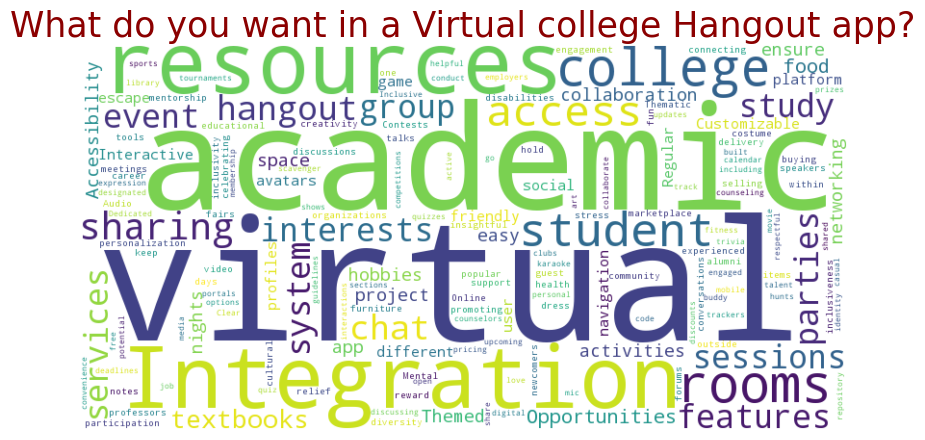

In [60]:
# Use Natural Language Processing techniques on your D4-2 dataset. (Hint: See CS6 course materials.)
df = pd.read_excel("/drive/J-Virtual College Hangout-D4-2.xlsx")
feedback_text = ' '.join(df['What do you want in a virtual college hangout?']) 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("What do you want in a Virtual college Hangout app?", fontsize=25, color='darkred') # Edit this title to whatever yours is supposed to be based on your use case and customize it.
plt.axis('off')
plt.show()

In [61]:
# Data Engineering:
# Write your merged D1_D2_D3 and D4-1 data to a new xlsx file.
merged_data_D1_D2_D3_D4_1.to_excel('/drive/merged_data_D1_D2_D3_D4_1.xlsx', index=False)


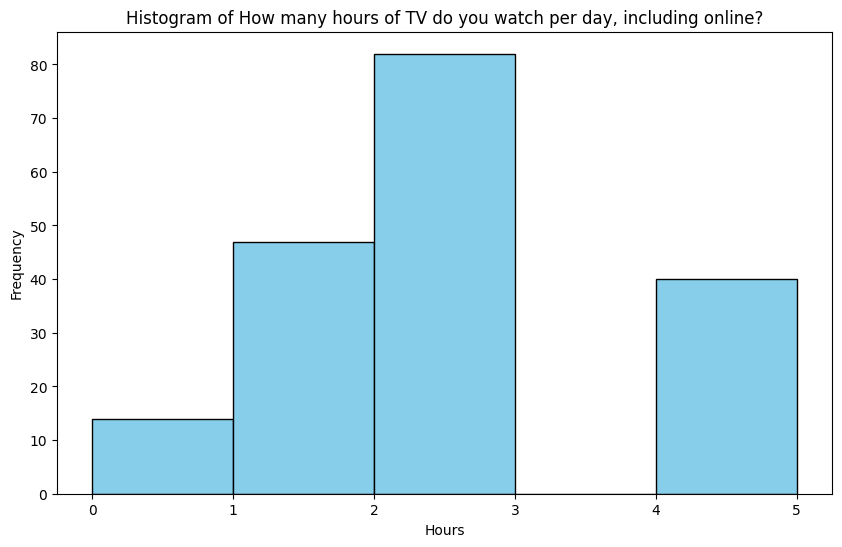

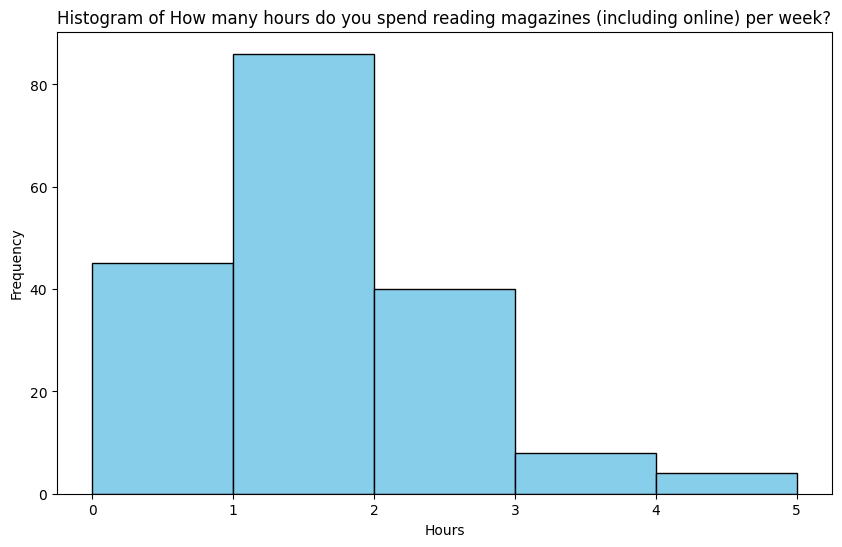

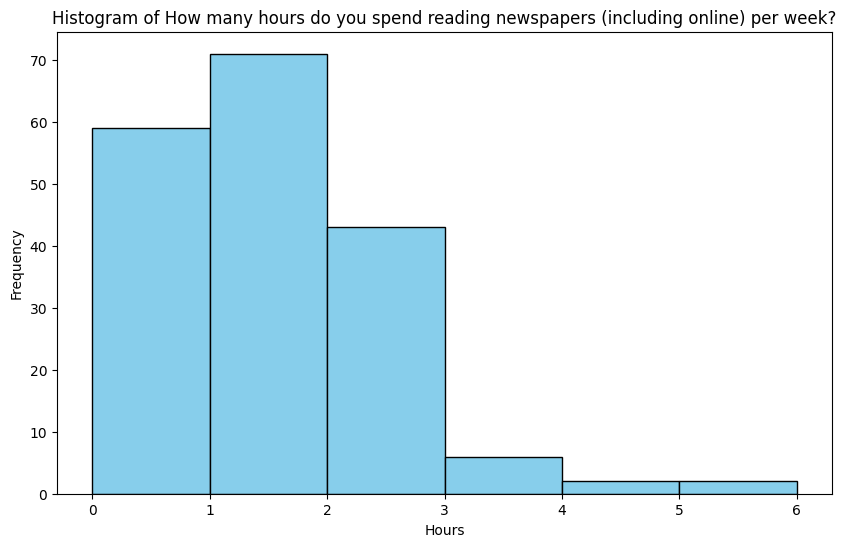

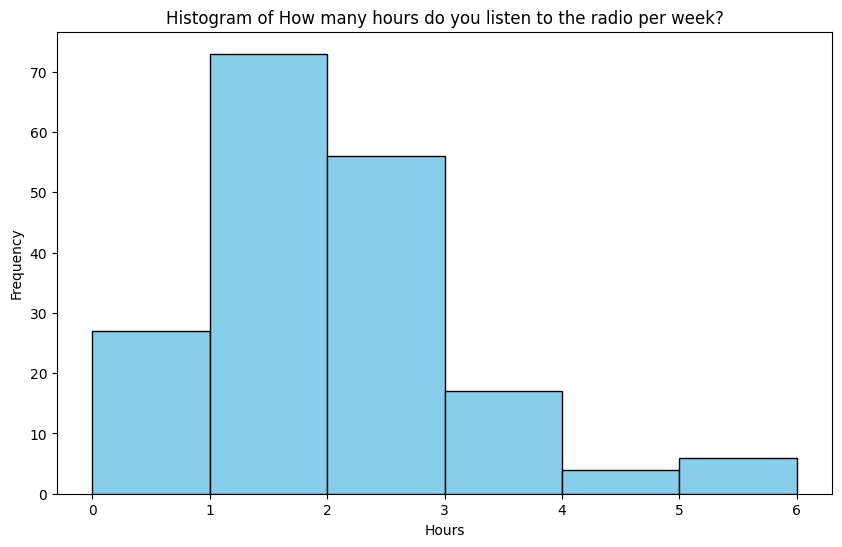

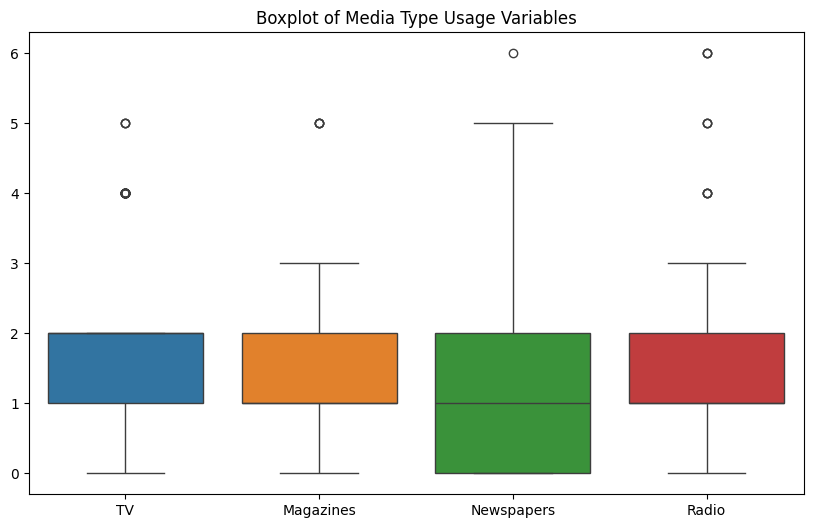

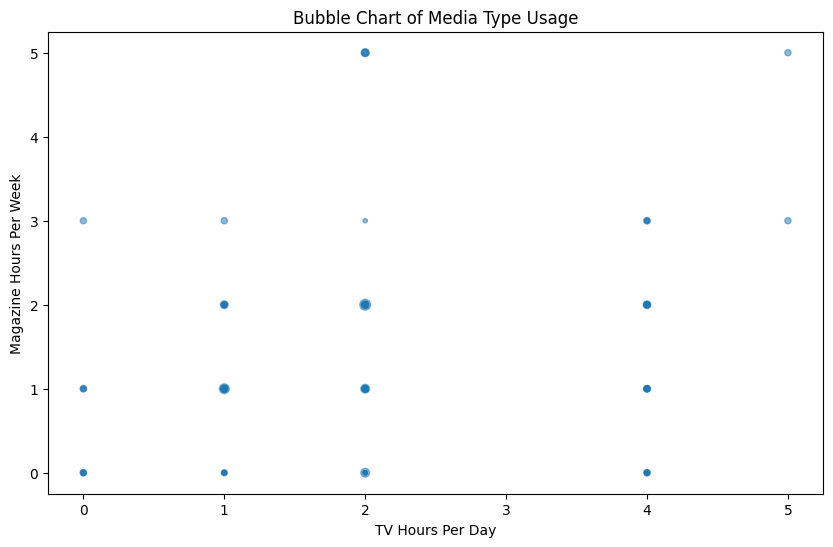

In [62]:
# Data Analysis:
# Make histograms, boxplots, and bubble charts of your media type usage variables (hint: D4-1 dataset).
question_mapping = {
    'Q14': 'How many hours of TV do you watch per day, including online?',
    'Q15': 'How many hours do you spend reading magazines (including online) per week?',
    'Q16': 'How many hours do you spend reading newspapers (including online) per week?',
    'Q17': 'How many hours do you listen to the radio per week?'
}

media_usage_columns = ['Q14', 'Q15', 'Q16', 'Q17']

# Histograms for media type usage variables
for column in media_usage_columns:
    plt.figure(figsize=(10, 6))
    # Assuming your DataFrame is named 'college_hangout_d4_1_data' and has been loaded correctly
    plt.hist(college_hangout_d4_1_data[column].dropna(), bins=range(int(college_hangout_d4_1_data[column].min()), int(college_hangout_d4_1_data[column].max()) + 1, 1), color='skyblue', edgecolor='black')
    # Use the question mapping for the title
    plt.title(f'Histogram of {question_mapping[column]}')
    plt.xlabel('Hours')
    plt.ylabel('Frequency')
    plt.xticks(range(int(college_hangout_d4_1_data[column].min()), int(college_hangout_d4_1_data[column].max()) + 1, 1))
    plt.show()

# Boxplots for media type usage variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=college_hangout_d4_1_data[media_usage_columns])
plt.title('Boxplot of Media Type Usage Variables')
plt.xticks(ticks=range(len(media_usage_columns)), labels=['TV', 'Magazines', 'Newspapers', 'Radio'])
plt.show()
# For the bubble chart, you need to choose a variable for the x-axis, one for the y-axis, and one for the size.
plt.figure(figsize=(10, 6))
plt.scatter(x=college_hangout_d4_1_data['Q14'], y=college_hangout_d4_1_data['Q15'], s=college_hangout_d4_1_data['Q16']*10, alpha=0.5)
plt.title('Bubble Chart of Media Type Usage')
plt.xlabel('TV Hours Per Day')
plt.ylabel('Magazine Hours Per Week')
# Adjust the size argument as needed for better visualization
plt.show()

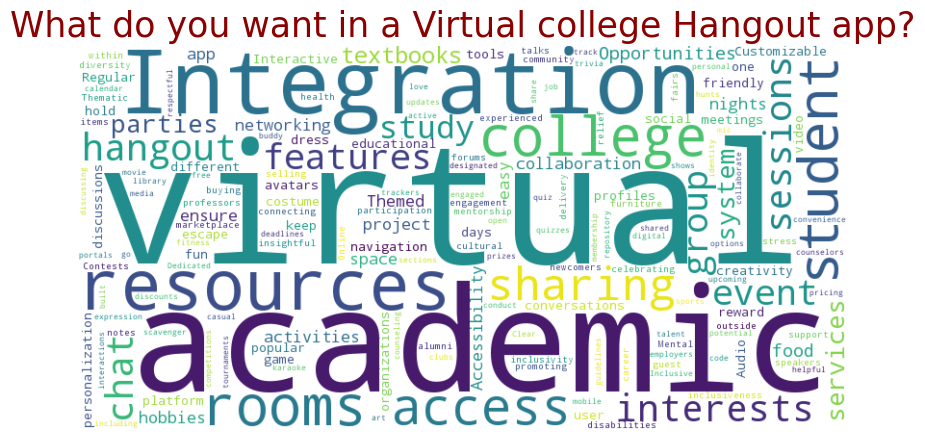

In [63]:
# Make a word cloud of your client's focus group text data (hint: D4-2 dataset and .ipynb file).
df = pd.read_excel("/drive/J-Virtual College Hangout-D4-2.xlsx")
feedback_text = ' '.join(df['What do you want in a virtual college hangout?']) 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("What do you want in a Virtual college Hangout app?", fontsize=25, color='darkred') # Edit this title to whatever yours is supposed to be based on your use case and customize it.
plt.axis('off')
plt.show()

In [64]:

# Data Reporting: 
# Based on your analyses, answer these questions:
# What is the average usage behavior of print media types among your client's target customers?
# What is the average usage behavior of video media types among your client's target customers?
# What is the average usage behavior of audio media types among your client's target customers?
# What are the predominant attributes that your client's target customers want in the product or service that your use case is based on? (Hint: Use your analysis of your D4-2 dataset).



# Average Usage Behavior of Print Media Types:
# For reading magazines, the most common number of hours spent per week is between 1 to 2 hours, with the frequency decreasing as the number of hours increases.
# Newspaper reading behavior is similar to magazine reading, with a peak in the 1 to 2-hour range per week
#     .
# Average Usage Behavior of Video Media Types:
# TV watching per day, including online, shows that the most common behavior is watching for 2 to 3 hours, with a significant decrease in frequency for higher number of hours.

# Average Usage Behavior of Audio Media Types:
# The histogram for radio listening per week suggests that 2 to 3 hours per week is the most common behavior among your client's target customers, with frequency decreasing for higher numbers of hours.

# Activities and Events: The words 'event', 'activities', 'sessions', and 'parties' are quite prominent, which implies an interest in a variety of in-app events and activities, such as themed parties, casual meet-ups, or educational sessions.
# Personalization: Users seem to be interested in customization and personalization, as indicated by words like 'interests', 'customizable', and 'personalization', meaning they want an app that adapts to their preferences and interests.
# Education and Learning: There is a noticeable presence of words related to learning, such as 'study', 'educational', 'academy', and 'textbooks', which could mean users are looking for opportunities to learn or access educational content even while considering vacation options.
# Entertainment: The mention of 'movies', 'games', 'karaoke', and 'trivia' suggests entertainment features are also important for engaging the users within the app.
# Inclusivity: The word 'inclusivity' indicates a desire for the app to cater to a diverse audience, ensuring accessibility for users with different needs and preferences.
# Ease of Use and Accessibility: With 'easy' and 'access' being significant, the app should be user-friendly and easily navigable.
# Support and Services: Terms like 'support', 'services', and 'help' point towards the need for customer support and additional services being integrated into the app.

In [65]:
# Space intentionally blank to separate sections.

In [66]:
"""
PP Objectives & Requirements 5 (OR5):

Data Inspection:
Inspect the contents of each of your D5 dataset variables to determine what is available for use in your PP TCP use case to communicate to your client. This includes the "Data" and the "Data Dictionary" sheets that exists within the D5 XLSX file.

Data Processing:
Create and apply a column_name_mapping dictionary to your D1, D3, D4-1, and D5 datasets. (Hint: See "Python Code Helper #7" and "Python Code Helper #8" ipynb files.) This process can be done separately on each dataset, or it can be done on a merged dataset.

Data Engineering:
Create a named variable list of data labels for each of the demographics in your D1.
Create a named variable list of data labels for each of the variables in your D3.
Create a named variable list of data labels that is common to each of your D4-1 variables.
Create a named variable list of data labels for each of the types variables in your D5.

Data Analysis:
Make a pie, donut, or bar charts for each of the your D1 variables that each contain optimized chart titles (Hint: See "Python Code Helper #7" and "Python Code Helper #8" ipynb files.).
Make a pie, donut, or bar charts for each of the your D3 variables that each contain optimized chart titles (Hint: See "Python Code Helper #7" and "Python Code Helper #8" ipynb files.).
Make a pie, donut, or bar charts for each of the your D5 variables that each contain optimized chart titles (Hint: See "Python Code Helper #7" and "Python Code Helper #8" ipynb files.).

Data Reporting:
Based on your analyses, provide written data insights to summarize what you found for each of your D1 variables.
Based on your analyses, provide written data insights to summarize what you found for each of your D3 variables.
Based on your analyses, provide written data insights to summarize what you found for each of your D5 variables. 

Note: All teams are required to meet these OR5 in the final submission of their PP TCP.
"""

'\nPP Objectives & Requirements 5 (OR5):\n\nData Inspection:\nInspect the contents of each of your D5 dataset variables to determine what is available for use in your PP TCP use case to communicate to your client. This includes the "Data" and the "Data Dictionary" sheets that exists within the D5 XLSX file.\n\nData Processing:\nCreate and apply a column_name_mapping dictionary to your D1, D3, D4-1, and D5 datasets. (Hint: See "Python Code Helper #7" and "Python Code Helper #8" ipynb files.) This process can be done separately on each dataset, or it can be done on a merged dataset.\n\nData Engineering:\nCreate a named variable list of data labels for each of the demographics in your D1.\nCreate a named variable list of data labels for each of the variables in your D3.\nCreate a named variable list of data labels that is common to each of your D4-1 variables.\nCreate a named variable list of data labels for each of the types variables in your D5.\n\nData Analysis:\nMake a pie, donut, or 

In [68]:
# Data Inspection:
# Inspect the contents of each of your D5 dataset variables to determine what is available for use in your PP TCP use case to communicate to your client. This includes the "Data" and the "Data Dictionary" sheets that exists within the D5 XLSX file.
d5_file_path = '/drive/J-Virtual College Hangout-D5.xlsx'
college_hangout_d5_data = pd.read_excel(d5_file_path, sheet_name='Data')
college_hangout_d5_data_dictionary = pd.read_excel(d5_file_path, sheet_name='Data Dictionary')

print(college_hangout_d5_data.head())
print(college_hangout_d5_data_dictionary.head())

   ID  Q18  Q19  Q20  Q21
0   1    2    0   -1    1
1   2    2    2    1    3
2   3    6    4    1    4
3   4    3    3   -1    4
4   5    5    3   -1    4
    ID  \
0  Q18   
1  Q19   
2  Q20   
3  Q21   

                                                                                                                           ResponseID  \
0                                         How much would you be willing to pay monthly for a membership to a Virtual College Hangout?   
1                                How much would you spend on purchasing members-only merchandise from a Virtual College Hangout shop?   
2                                        How likely are you to purchase members-only merchandise from a Virtual College Hangout shop?   
3  How often would you like to receive news, events, and social interaction information notifications from a Virtual College Hangout?   

            Unnamed: 2           Unnamed: 3         Unnamed: 4  \
0  I would not use (0)  I would not pay (

In [69]:

# Data Processing:
# Create and apply a column_name_mapping dictionary to your D1, D3, D4-1, and D5 datasets. (Hint: See "Python Code Helper #7" and "Python Code Helper #8" ipynb files.) This process can be done separately on each dataset, or it can be done on a merged dataset.

#D1 dataset
D1_column_names_keys = college_hangout_d1_data.columns.tolist()
D1_DD_T = college_hangout_d1_data_dict.T.reset_index()
D1_column_names_values = D1_DD_T.iloc[1].tolist() 
D1_column_name_mapping = {}
for key, value in zip(D1_column_names_keys, D1_column_names_values):
    D1_column_name_mapping[key] = value
print("D1_column_name_mapping dictionary:", D1_column_name_mapping)

D1_column_name_mapping dictionary: {'ID': 'ResponseID', 'Q1': 'What is your Gender?', 'Q2': 'What is your age?', 'Q3': 'What is your marital status?', 'Q4': 'What is your ethnicity?', 'Q5': 'What is your current college level?', 'Q6': 'What college does your major belong to?', 'Q7': 'What is your monthly income?'}


In [70]:
#D3 dataset
D3_column_names_keys = college_hangout_data_d3.columns.tolist()
D3_DD_T = college_hangout_data_dictionary_d3.T.reset_index()
D3_column_names_values = D3_DD_T.iloc[1].tolist() 
D3_column_name_mapping = {}
for key, value in zip(D3_column_names_keys, D3_column_names_values):
    D3_column_name_mapping[key] = value
print("D3_column_name_mapping dictionary:", D3_column_name_mapping)

D3_column_name_mapping dictionary: {'ID': 'ResponseID', 'Q8': 'I would like to see a new Virtual College Hangout for my specific college.', 'Q9': 'I would join a new Virutal College Hangout for my specific college.', 'Q10': 'How often would you visit a Virtual College Hangout for your specific college?', 'Q11': 'How interested would you be in subscribing to information and event notifications for a Virtual College Hangout for your specific college?', 'Q12': 'How often would you like to receive information and event notifications for a Virtual College Hangout for your specific college?', 'Q13': 'How many hours do you spend online per day?'}


In [71]:
#D4-1 dataset
D4_1_column_names_keys = college_hangout_d4_1_data.columns.tolist()
D4_1_DD_T = college_hangout_d4_1_data_dictionary.T.reset_index()
D4_1_column_names_values = D4_1_DD_T.iloc[1].tolist() 
D4_1_column_name_mapping = {}
for key, value in zip(D4_1_column_names_keys, D4_1_column_names_values):
    D4_1_column_name_mapping[key] = value
print("D4_1_column_name_mapping dictionary:", D4_1_column_name_mapping)

D4_1_column_name_mapping dictionary: {'ID': 'ResponseID', 'Q14': 'How many hours of TV do you watch per day, including online?', 'Q15': 'How many hours do you spend reading magazines (including online) per week?', 'Q16': 'How many hours do you spend reading newspapers (including online) per week?', 'Q17': 'How many hours of radio (including online) do you listen to per day?'}


In [72]:
#D5 dataset
D5_column_names_keys = college_hangout_d5_data.columns.tolist()
D5_DD_T = college_hangout_d5_data_dictionary.T.reset_index()
D5_column_names_values = D5_DD_T.iloc[1].tolist() 
D5_column_name_mapping = {}
for key, value in zip(D5_column_names_keys, D5_column_names_values):
    D5_column_name_mapping[key] = value
print("D5_column_name_mapping dictionary:", D5_column_name_mapping)

D5_column_name_mapping dictionary: {'ID': 'ResponseID', 'Q18': 'How much would you be willing to pay monthly for a membership to a Virtual College Hangout?', 'Q19': 'How much would you spend on purchasing members-only merchandise from a Virtual College Hangout shop?', 'Q20': 'How likely are you to purchase members-only merchandise from a Virtual College Hangout shop?', 'Q21': 'How often would you like to receive news, events, and social interaction information notifications from a Virtual College Hangout?'}


In [73]:
# Data Engineering:
# Create a named variable list of data labels for each of the demographics in your D1.
labels_d1 = [label.split(': ')[-1] for label in D1_column_name_mapping.values()]
labels_d1

['ResponseID',
 'What is your Gender?',
 'What is your age?',
 'What is your marital status?',
 'What is your ethnicity?',
 'What is your current college level?',
 'What college does your major belong to?',
 'What is your monthly income?']

In [74]:
# Create a named variable list of data labels for each of the variables in your D3.
labels_d3 = [label.split(': ')[-1] for label in D3_column_name_mapping.values()]
labels_d3

['ResponseID',
 'I would like to see a new Virtual College Hangout for my specific college.',
 'I would join a new Virutal College Hangout for my specific college.',
 'How often would you visit a Virtual College Hangout for your specific college?',
 'How interested would you be in subscribing to information and event notifications for a Virtual College Hangout for your specific college?',
 'How often would you like to receive information and event notifications for a Virtual College Hangout for your specific college?',
 'How many hours do you spend online per day?']

In [75]:
# Create a named variable list of data labels that is common to each of your D4-1 variables.
labels_d4_1 = [label.split(': ')[-1] for label in D4_1_column_name_mapping.values()]
labels_d4_1

['ResponseID',
 'How many hours of TV do you watch per day, including online?',
 'How many hours do you spend reading magazines (including online) per week?',
 'How many hours do you spend reading newspapers (including online) per week?',
 'How many hours of radio (including online) do you listen to per day?']

In [76]:
# Create a named variable list of data labels for each of the types variables in your D5.
labels_d5 = [label.split(': ')[-1] for label in D5_column_name_mapping.values()]
labels_d5

['ResponseID',
 'How much would you be willing to pay monthly for a membership to a Virtual College Hangout?',
 'How much would you spend on purchasing members-only merchandise from a Virtual College Hangout shop?',
 'How likely are you to purchase members-only merchandise from a Virtual College Hangout shop?',
 'How often would you like to receive news, events, and social interaction information notifications from a Virtual College Hangout?']

In [77]:
# Data Analysis:
# Make a pie, donut, or bar charts for each of the your D1 variables that each contain optimized chart titles (Hint: See "Python Code Helper #7" and "Python Code Helper #8" ipynb files.).
import os

# Define the mapping for the response codes to strings based on your dataset image
response_mappings = {
    'Q1': {1: 'Male', 2: 'Female'},
    'Q3': {1: 'Single', 2: 'Married', 3: 'Divorced', 4: 'Widowed'},
    'Q4': {1: 'Amerindian Indian', 2: 'African American', 3: 'Mexican American', 
           4: 'Other Hispanic', 5: 'Asian', 6: 'Southeast Asian', 7: 'Pacific Islander', 
           8: 'Filipino', 9: 'Multiple Ethnicities', 10: 'White', 11: 'Other/Not Stated', 
           12: 'International'},
    'Q5': {1: 'Freshman', 2: 'Sophomore', 3: 'Junior', 4: 'Senior', 5: 'Graduate'},
    'Q6': {1: 'Arts & Letters', 2: 'Business', 3: 'Education', 4: 'Engineering', 
           5: 'Health & Human Services', 6: 'Professional Studies & Fine Arts', 
           7: 'Undergraduate Studies', 8: 'Graduate Studies'},
    'Q7': {1: '$499 or less', 2: '$500 to 999', 3: '$1,000 to 1,499', 4: '$1,500 to 1,999', 
           5: '$2,000 or more'}
}

# Apply the response mappings
for column, mapping in response_mappings.items():
    if column in college_hangout_d1_data.columns:
        college_hangout_d1_data[column] = college_hangout_d1_data[column].map(mapping)

# Create a directory to store the visualization files
output_directory = "D1_Pie_charts"
os.makedirs(output_directory, exist_ok=True)
# Generate visualizations for each column
for column in response_mappings:
    if column in college_hangout_d1_data.columns:
        # Count the occurrences of each response
        response_counts = college_hangout_d1_data[column].value_counts(normalize=True)  # Use normalize=True for proportions
        
        # Create the pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(response_counts, labels=response_counts.index, startangle=90, autopct='%1.1f%%', explode=[0.1]*len(response_counts))
        plt.title(D1_column_name_mapping[column])
        
        # Save the pie chart
        plt.savefig(os.path.join(output_directory, f'{column}_pie_chart.png'), bbox_inches='tight')
        plt.close()

print(f"Visualizations saved to '{output_directory}' directory.")

Visualizations saved to 'D1_Pie_charts' directory.


In [78]:
# Make a pie, donut, or bar charts for each of the your D3 variables that each contain optimized chart titles (Hint: See "Python Code Helper #7" and "Python Code Helper #8" ipynb files.).
response_mappings = {
    'Q8': {-2: 'Strongly disagree', -1: 'Disagree', 0: 'Unsure', 1: 'Agree', 2: 'Strongly agree'},
    'Q9': {-2: 'Strongly disagree', -1: 'Disagree', 0: 'Unsure', 1: 'Agree', 2: 'Strongly agree'},
    'Q10': {0: 'Never', 1: 'A couple of times per year', 2: 'Once per month', 3: 'Once per week', 4: 'Daily'},
    'Q11': {-2: 'Very uninterested', -1: 'Uninterested', 0: 'Unsure', 1: 'Interested', 2: 'Very interested'},
    'Q12': {0: 'Never', 1: 'Monthly', 2: 'Weekly', 3: 'Daily'},
    'Q13': {-2: 'Strongly disagree', -1: 'Disagree', 0: 'Unsure', 1: 'Agree', 2: 'Strongly agree'},
}

# Apply the response mappings
for column, mapping in response_mappings.items():
    if column in college_hangout_data_d3.columns:
        college_hangout_data_d3[column] = college_hangout_data_d3[column].map(mapping)

# Create a directory to store the visualization files
output_directory = "D3_Pie_charts"
os.makedirs(output_directory, exist_ok=True)

# Generate visualizations for each column
for column in response_mappings:
    if column in college_hangout_data_d3.columns:
        # Count the occurrences of each response
        response_counts = college_hangout_data_d3[column].value_counts(normalize=True)  # Use normalize=True for proportions
        
        # Create the pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(response_counts, labels=response_counts.index, startangle=90, autopct='%1.1f%%', explode=[0.1]*len(response_counts))
        plt.title(D3_column_name_mapping[column])
        
        # Save the pie chart
        plt.savefig(os.path.join(output_directory, f'{column}_pie_chart.png'), bbox_inches='tight')
        plt.close()

print(f"Visualizations saved to '{output_directory}' directory.")

Visualizations saved to 'D3_Pie_charts' directory.


In [79]:
# Make a pie, donut, or bar charts for each of the your D5 variables that each contain optimized chart titles (Hint: See "Python Code Helper #7" and "Python Code Helper #8" ipynb files.).
response_mappings = {
    'Q18': {0: 'I would not use', 1: 'I would not pay', 2: '$9.99 or less', 3: '$10 to $29.99', 
            4: '$30 to $49.99', 5: '$50 to $69.99', 6: '$70 or more'},
    'Q19': {0: 'I would not use', 1: '$9.99 or less', 2: '$10 to $29.99', 3: '$30 to $49.99', 
            4: '$50 to $69.99', 5: '$70 to $89.99', 6: '$90 or more'},
    'Q20': {-2: 'Very unlikely', -1: 'Unlikely', 0: 'Unsure', 1: 'Likely', 2: 'Very likely'},
    'Q21': {1: 'Never', 2: 'Daily', 3: 'Weekly', 4: 'Monthly'},
}
# Apply the response mappings
for column, mapping in response_mappings.items():
    if column in college_hangout_d5_data.columns:
        college_hangout_d5_data[column] = college_hangout_d5_data[column].map(mapping)

# Create a directory to store the visualization files
output_directory = "D5_Pie_charts"
os.makedirs(output_directory, exist_ok=True)

# Generate visualizations for each column
for column in response_mappings:
    if column in college_hangout_d5_data.columns:
        # Count the occurrences of each response
        response_counts = college_hangout_d5_data[column].value_counts(normalize=True)  # Use normalize=True for proportions
        
        # Create the pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(response_counts, labels=response_counts.index, startangle=90, autopct='%1.1f%%', explode=[0.1]*len(response_counts))
        plt.title(D5_column_name_mapping[column])
        
        # Save the pie chart
        plt.savefig(os.path.join(output_directory, f'{column}_pie_chart.png'), bbox_inches='tight')
        plt.close()

print(f"Visualizations saved to '{output_directory}' directory.")

Visualizations saved to 'D5_Pie_charts' directory.


In [80]:

# Data Reporting:
# Based on your analyses, provide written data insights to summarize what you found for each of your D1 variables.


# College Major Categories:
    # Business majors constitute the largest group with 32.2%.
    # This is followed by Professional Studies & Fine Arts at 21.3% and Undergraduate Studies at 17.5%.
    # The smallest categories include Education at 2.3% and Engineering at 2.2%.
# Ethnicity:
    # White individuals make up the majority with 50.8%.
    # Mexican American is the next largest ethnicity at 19.1%, followed by Asian at 6.6% and Filipino at 8.2%.
    # Other ethnicities, including multiple ethnicities, African American, Pacific Islander, and American Indian, among others, make up smaller portions, each less than 5%.
# Monthly Income:
    # The largest income group is those earning $499 or less per month, making up 54.1% of the total.
    # The next largest group earns between $500 to $999, constituting 23%.
    # Only a small fraction, 2.7%, earn $2,000 or more per month.
# College Level:
    # Juniors represent the largest percentage at 38.8%.
    # Seniors come next, making up 31.7% of the college levels.
    # Freshmen and sophomores have smaller shares, with 7.1% and 21.9% respectively.
    # There's a very small percentage of graduate students at 0.5%.
# Marital Status:
    # A vast majority are single, at 91.8%.
    # Married students make up 5.5%, and a negligible percentage are widowed or divorced (0.2% and 2.5% respectively).
# Gender:
    # Females make up a significant majority, at 74.3%.
    # Males constitute the remaining 25.7%.

In [81]:
# Based on your analyses, provide written data insights to summarize what you found for each of your D3 variables.

# Willingness to Join a Virtual College Hangout:
    # A large portion of respondents, 43.7%, agree with joining a new Virtual College Hangout for their specific college.
    # 21.3% strongly agree, indicating a significant overall interest.
    # 24.6% are unsure, while a minority of respondents disagree (6.0%) or strongly disagree (4.4%).
# Interest in Subscribing to Notifications for a Virtual College Hangout:
    # The majority are unsure (39.9%) about subscribing to information and event notifications for a Virtual College Hangout.
    # 26.2% are interested, and only a small fraction is very interested (1.1%).
    # On the other hand, 15.8% are uninterested and 16.9% are very uninterested.
# Frequency of Visiting a Virtual College Hangout:
    # A plurality, 41.0%, would visit a Virtual College Hangout once per week.
    # 31.8% would visit once per month, while a smaller number would visit daily (4.6%).
    # There is a significant portion that would never visit (13.9%).
# Desire to See a New Virtual College Hangout:
    # Nearly half of the respondents, 48.6%, agree that they would like to see a new Virtual College Hangout.
    # 24.6% strongly agree with this sentiment.
    # However, a considerable number are unsure (18.6%), and a few disagree (5.5%) or strongly disagree (2.7%).
# Daily Online Hours:
    # A vast majority, 91.9%, strongly agree that they spend many hours online per day.
    # Only a small group is unsure (1.4%) or agrees to a lesser extent (6.8%).
# Frequency Preference for Receiving Notifications:
    # Respondents are split between wanting to receive notifications weekly (39.9%) and never wanting to receive them (39.3%).
    # 15.8% would prefer monthly notifications, and a very small group would like daily notifications (4.9%).


In [82]:
# Based on your analyses, provide written data insights to summarize what you found for each of your D5 variables.

# Likelihood of Purchasing Members-Only Merchandise:
    # A notable portion of respondents, 37.2%, say they are likely to purchase members-only merchandise from a Virtual College Hangout shop.
    # 15.8% are very likely to make a purchase, indicating a positive inclination towards buying exclusive merchandise.
    # However, 20.2% find it very unlikely, and 15.8% unlikely, with 10.9% remaining unsure.
# Spending Amount on Merchandise:
    # The largest group, 41.0%, would spend between $30 to $49.99 on purchasing members-only merchandise from a Virtual College Hangout shop.
    # 25.7% would be willing to spend between $50 to $69.99.
    # A smaller fraction of respondents would opt for the lower ($9.99 or less, 5.5%) and higher ($90 or more, 6.6%) spending ranges, and 10.4% indicate they would not use the shop.
# Willingness to Pay for Membership:
    # The majority of respondents, 37.7%, would be willing to pay between $10 to $29.99 monthly for a membership to a Virtual College Hangout.
    # The second-largest group, 34.4%, would only pay $9.99 or less.
    # Only a small percentage would be willing to pay in the higher ranges ($50 to $69.99 at 4.4%, and $70 or more at 3.3%), while 16.4% would not pay for membership.
# Frequency of Receiving Notifications:
    # Respondents are equally split (38.8% each) between never wanting to receive notifications and wanting to receive them weekly.
    # A smaller portion, 19.7%, prefer monthly notifications, and very few (2.7%) would like to receive daily notifications.

In [83]:
"""
PP Objectives & Requirements 6 (OR6):

Data Inspection:
Inspect the contents of each of your D6 dataset variables to determine what is available for use in your PP TCP use case to communicate to your client. This includes the "Data" and the "Data Dictionary" sheets that exists within the D6 XLSX file.

Data Processing:
Create and apply a column_name_mapping dictionary to your D6 dataset. (Hint: See "Python Code Helper #8" ipynb file.)
Group data by demographic variables to find possible differences between groups for important variables that the client can use to try to create marketing segmentation strategies to increase target customer engagement and adoption of the proposed product or service. (Hint: See "Python Code Helper #2" ipynb file for an example.)

Data Engineering:
Create a variable that contains a list of all of the agreement scale variables contained in your use case datasets.
Create a variable that contains a list of all of the likelihood scale variables contained in your use case datasets.
Create a variable that contains a list of all of the motivation scale variables contained in your use case datasets.
Create a variable that contains a list of all of the interest scale variables contained in your use case datasets.
Create a variable that contains a list of all of the checked box variables contained in your use case datasets.
Create a variable that contains a list of all of the importance scale variables contained in your use case datasets.
Create a variable that contains a list of all of the proposed product or service frequency of use scale variables contained in your use case datasets (scales must match exactly to be placed into the same list).
Create a variable that contains a list of all of the media usage scale variables contained in your use case datasets.
NOTE: If you assigned use case does not contain one or more of the above-mentioned scales, then omit the requirement, but be sure to fully process all of the variables in your assigned use case in the appropriate manner regarding the scales.

Data Analysis:
Make a pie, donut, or bar charts for each of your D6 variables that each contain optimized chart titles (Hint: See "Python Code Helper #7" and "Python Code Helper #8" ipynb files.).

Data Reporting:
Based on your analyses, answer these questions:
What are some key differences based on gender regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?
What are some key differences based on ethnicity regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?
What are some key differences based on target customer income level categories regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?
Based on your analyses, provide written data insights to summarize what you found for each of your D6 variables.

Note: All teams are required to meet these OR6 in the final submission of their PP TCP.


(This OR6 is the last set of the Objectives & Requirements (ORs) for the PP TCP.)
"""

'\nPP Objectives & Requirements 6 (OR6):\n\nData Inspection:\nInspect the contents of each of your D6 dataset variables to determine what is available for use in your PP TCP use case to communicate to your client. This includes the "Data" and the "Data Dictionary" sheets that exists within the D6 XLSX file.\n\nData Processing:\nCreate and apply a column_name_mapping dictionary to your D6 dataset. (Hint: See "Python Code Helper #8" ipynb file.)\nGroup data by demographic variables to find possible differences between groups for important variables that the client can use to try to create marketing segmentation strategies to increase target customer engagement and adoption of the proposed product or service. (Hint: See "Python Code Helper #2" ipynb file for an example.)\n\nData Engineering:\nCreate a variable that contains a list of all of the agreement scale variables contained in your use case datasets.\nCreate a variable that contains a list of all of the likelihood scale variables co

In [85]:
# Data Inspection:
# Inspect the contents of each of your D6 dataset variables to determine what is available for use in your PP TCP use case to communicate to your client. This includes the "Data" and the "Data Dictionary" sheets that exists within the D6 XLSX file.
d6_file_path = '/drive/J-Virtual College Hangout-D6.xlsx'
college_hangout_d6_data = pd.read_excel(d6_file_path, sheet_name='Data')
college_hangout_d6_data_dictionary = pd.read_excel(d6_file_path, sheet_name='Data Dictionary')

print(college_hangout_d6_data.head())
print(college_hangout_d6_data_dictionary.head())

   ID  Q22  Q23  Q24  Q25  Q26  Q27  Q28  Q29  Q30  ...  Q42  Q43  Q44  Q45  \
0   1    1    1    1    1    1    2    2    2    8  ...    0    1   -2   -2   
1   2   -1    1    1    0   -1    0    0    1    6  ...    1    1    0    0   
2   3    0    1    1    1   -1    0    1    1    7  ...    1    1    0   -1   
3   4    2    2    2    2    2    2    2    1    8  ...    1    0    1   -2   
4   5    2    1    2    2    0    2    1    2    6  ...    0    0    0   -1   

   Q46  Q47  Q48  Q49  Q50  Q51  
0   -2   -2   -2   -2   -2    8  
1    0    0    0    0    0    5  
2    0    1    1    1    0    9  
3   -2   -2    1    1   -2    7  
4   -1    1    1    1   -1    8  

[5 rows x 31 columns]
    ID  \
0  Q22   
1  Q23   
2  Q24   
3  Q25   
4  Q26   

                                                                                               ResponseID  \
0     How likely are you to engage in discussion in a Virtual College Hangout about this category: Sports   
1     How likely ar

In [86]:
# Data Processing:
# Create and apply a column_name_mapping dictionary to your D6 dataset. (Hint: See "Python Code Helper #8" ipynb file.)
D6_column_names_keys = college_hangout_d6_data.columns.tolist()
D6_DD_T = college_hangout_d6_data_dictionary.T.reset_index()
D6_column_names_values = D6_DD_T.iloc[1].tolist() 
D6_column_name_mapping = {}
for key, value in zip(D6_column_names_keys, D6_column_names_values):
    D6_column_name_mapping[key] = value
print("D6_column_name_mapping dictionary:", D6_column_name_mapping)


D6_column_name_mapping dictionary: {'ID': 'ResponseID', 'Q22': 'How likely are you to engage in discussion in a Virtual College Hangout about this category: Sports', 'Q23': 'How likely are you to engage in discussion in a Virtual College Hangout about this category: Movies', 'Q24': 'How likely are you to engage in discussion in a Virtual College Hangout about this category: News', 'Q25': 'How likely are you to engage in discussion in a Virtual College Hangout about this category: Games', 'Q26': 'How likely are you to engage in discussion in a Virtual College Hangout about this category: Nightlife', 'Q27': 'How likely are you to engage in discussion in a Virtual College Hangout about this category: Technology', 'Q28': 'How likely are you to engage in discussion in a Virtual College Hangout about this category: Music', 'Q29': 'I would be interested in joining a Virtual College Hangout that allows me as a college student to meet new people and engage in interesting conversations.', 'Q30':

In [102]:
# Group data by demographic variables to find possible differences between groups for important variables that the client can use to try to create marketing segmentation strategies to increase target customer engagement and adoption of the proposed product or service. (Hint: See "Python Code Helper #2" ipynb file for an example.)


# Load data from different files into separate DataFrames
d1_data = pd.read_excel("/drive/J-Virtual College Hangout-D1.xlsx", sheet_name="Data")
d3_data = pd.read_excel("/drive/J-Virtual College Hangout-D3.xlsx", sheet_name="Data")
d4_1_data = pd.read_excel("/drive/J-Virtual College Hangout-D4-1.xlsx", sheet_name="Data")
d5_data = pd.read_excel("/drive/J-Virtual College Hangout-D5.xlsx", sheet_name="Data")
d6_data = pd.read_excel("/drive/J-Virtual College Hangout-D6.xlsx", sheet_name="Data")

# Merge the DataFrames based on a common column (ID)
data = pd.merge(d1_data, d3_data, on='ID')
data = pd.merge(data, d4_1_data, on='ID')
data = pd.merge(data, d5_data, on='ID')
data = pd.merge(data, d6_data, on='ID')

#Group data by gender
gender_groups = data.groupby('Q1')

# Compute mean values for important variables
gender_means = gender_groups[['Q8', 'Q9', 'Q10', 'Q18']].mean()

# Group data by ethnicity
ethnicity_groups = data.groupby('Q4')

# Compute mean values for important variables
ethnicity_means = ethnicity_groups[['Q8', 'Q9', 'Q10', 'Q18']].mean()

# Group data by income level
income_groups = data.groupby('Q18')

# Compute mean values for important variables
income_means = income_groups[['Q8', 'Q9', 'Q10', 'Q18', 'Q19']].mean()



In [103]:
# Data Engineering:
# Create a variable that contains a list of all of the agreement scale variables contained in your use case datasets.
agreement_scale_mapping = {-2: 'Strongly disagree', -1: 'Disagree', 0: 'Neither agree nor disagree', 1: 'Agree', 2: 'Strongly agree'}
agreement_scale_mapping

{-2: 'Strongly disagree',
 -1: 'Disagree',
 0: 'Neither agree nor disagree',
 1: 'Agree',
 2: 'Strongly agree'}

In [89]:
# Create a variable that contains a list of all of the likelihood scale variables contained in your use case datasets.
likelihood_scale_mapping = {-2: 'Very unlikely', -1: 'Unlikely', 0: 'Unsure', 1: 'Likely', 2: 'Very likely'}
likelihood_scale_mapping

{-2: 'Very unlikely',
 -1: 'Unlikely',
 0: 'Unsure',
 1: 'Likely',
 2: 'Very likely'}

In [90]:
# Create a variable that contains a list of all of the motivation scale variables contained in your use case datasets.
# Create a variable that contains a list of all of the interest scale variables contained in your use case datasets.
interest_scale_mapping = {
    0: 'Very uninterested',
    -1: 'Uninterested',
    1: 'Interested',
    2: 'Very interested'
}
interest_scale_mapping

{0: 'Very uninterested',
 -1: 'Uninterested',
 1: 'Interested',
 2: 'Very interested'}

In [91]:
# Create a variable that contains a list of all of the checked box variables contained in your use case datasets.
# Create a variable that contains a list of all of the importance scale variables contained in your use case datasets.
# Create a variable that contains a list of all of the proposed product or service frequency of use scale variables contained in your use case datasets (scales must match exactly to be placed into the same list).
frequency_labels_mapping = {
    0: 'Never',
    1: 'Monthly',
    2: 'Weekly',
    3: 'Daily'
}
frequency_labels_mapping

{0: 'Never', 1: 'Monthly', 2: 'Weekly', 3: 'Daily'}

In [92]:
# Create a variable that contains a list of all of the media usage scale variables contained in your use case datasets.
# NOTE: If you assigned use case does not contain one or more of the above-mentioned scales, then omit the requirement, but be sure to fully process all of the variables in your assigned use case in the appropriate manner regarding the scales.
media_usage_scale_mapping = {
    0: 'None',
    1: 'Less than one hour',
    2: '1 to almost 3 hours',
    3: '3 to almost 5 hours',
    4: '5 to almost 7 hours',
    5: '7 to almost 9 hours',
    6: '9 or more hours'
}
media_usage_scale_mapping

{0: 'None',
 1: 'Less than one hour',
 2: '1 to almost 3 hours',
 3: '3 to almost 5 hours',
 4: '5 to almost 7 hours',
 5: '7 to almost 9 hours',
 6: '9 or more hours'}

In [93]:

# Data Analysis:
# Make a pie, donut, or bar charts for each of your D6 variables that each contain optimized chart titles (Hint: See "Python Code Helper #7" and "Python Code Helper #8" ipynb files.).

exclude_columns = ['ID',
                   'Q30', 
                   'Q51']

# Create a directory to store the PNG files if it doesn't exist
output_directory = "D6-pie_charts_excluded"
os.makedirs(output_directory, exist_ok=True)

# Function to optimize chart title
def optimize_title(title):
    # Split the title into words and insert a newline after every tenth word for better readability
    words = title.split()
    optimized_title = ' '.join([words[i] if (i+1) % 10 else words[i]+'\n' for i in range(len(words))])
    return optimized_title
# Iterate through each column in the DataFrame, applying the likelihood mapping to specific columns
for column in college_hangout_d6_data.columns:
    if column in D6_column_name_mapping and column not in exclude_columns:
        if any(val in likelihood_scale_mapping for val in college_hangout_d6_data[column].unique()):
            college_hangout_d6_data[column] = college_hangout_d6_data[column].map(lambda x: likelihood_scale_mapping.get(x, x))

            # Count occurrences of each unique value in the column
            value_counts = college_hangout_d6_data[column].value_counts()
            # Get the optimized title from the D6_column_name_mapping
            title = optimize_title(D6_column_name_mapping[column])

            # Plot the pie chart with percentages
            plt.figure(figsize=(8, 8))
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            plt.title(title, wrap=True)

            # Save the plot as a PNG file
            output_file = os.path.join(output_directory, f"{column}_pie_chart.png")
            plt.savefig(output_file)
            plt.close()

print(f"Pie charts saved to {output_directory} directory.")

Pie charts saved to D6-pie_charts_excluded directory.


Gender Differences:


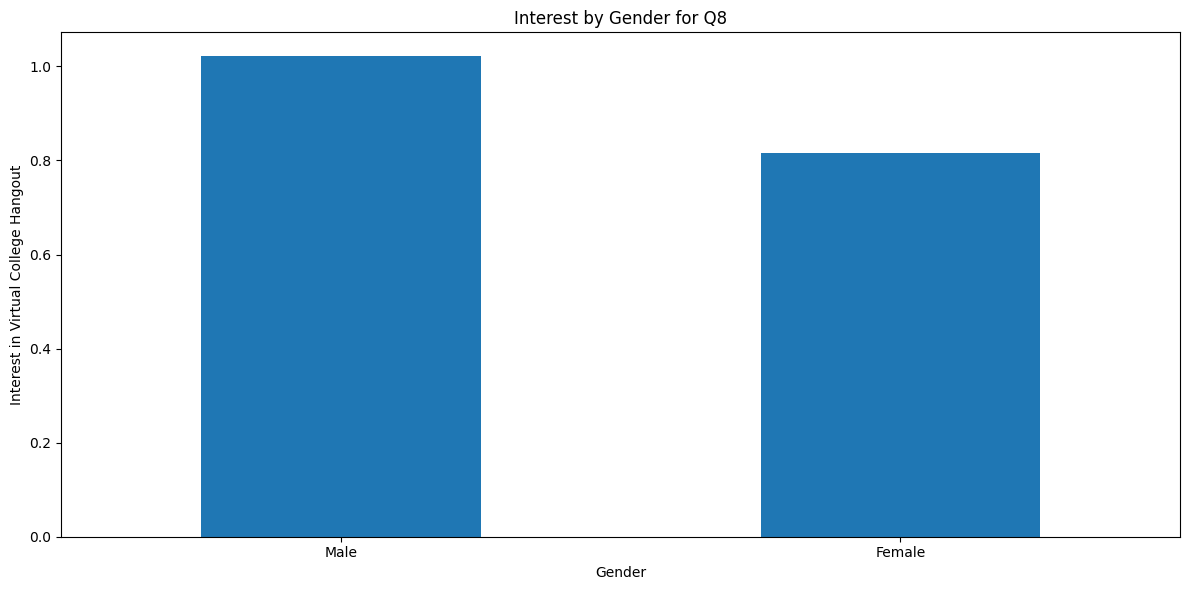

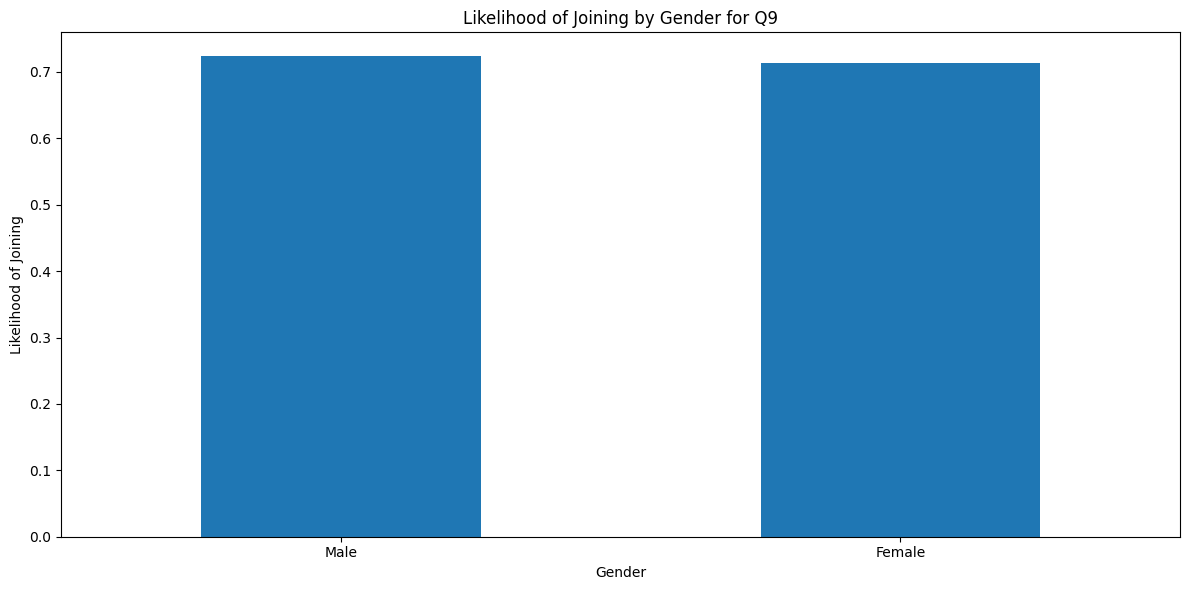

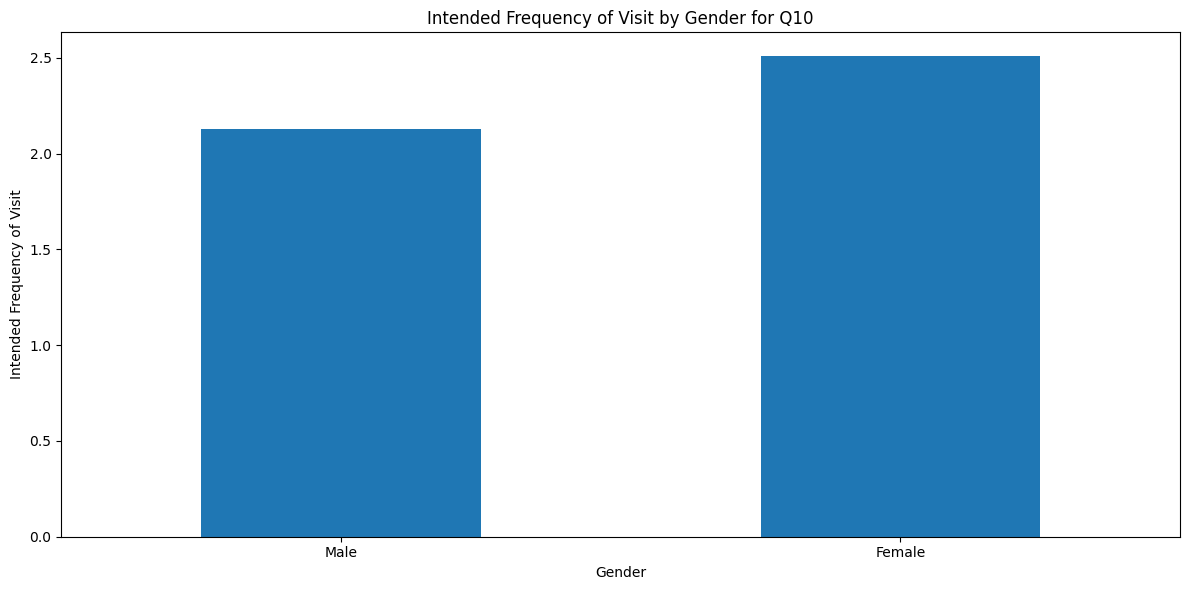

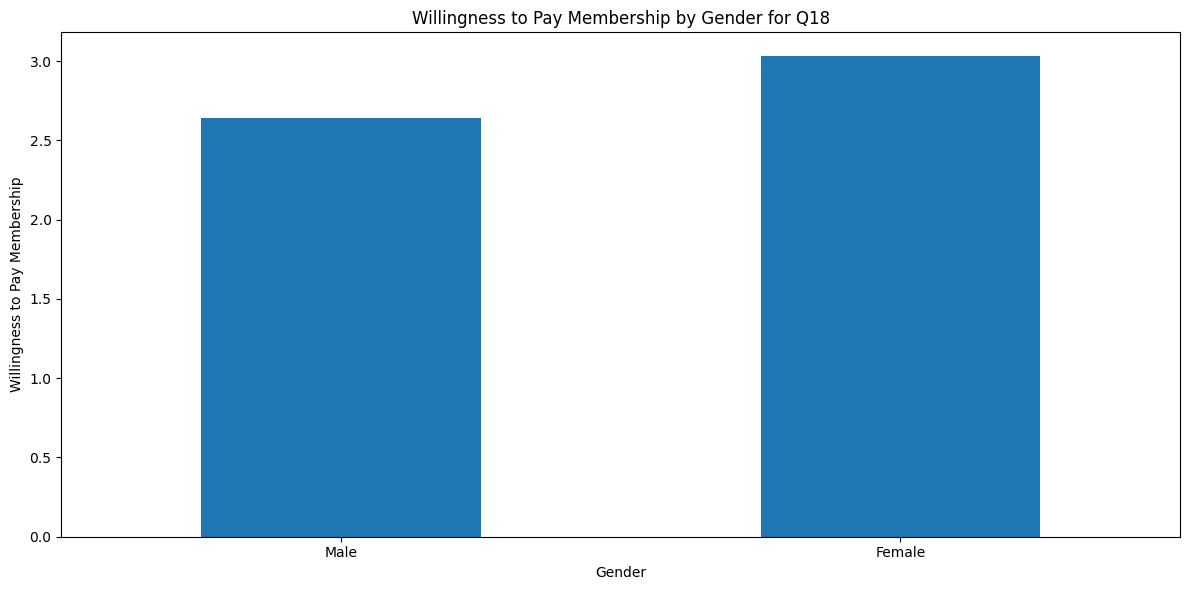


Ethnicity Differences:


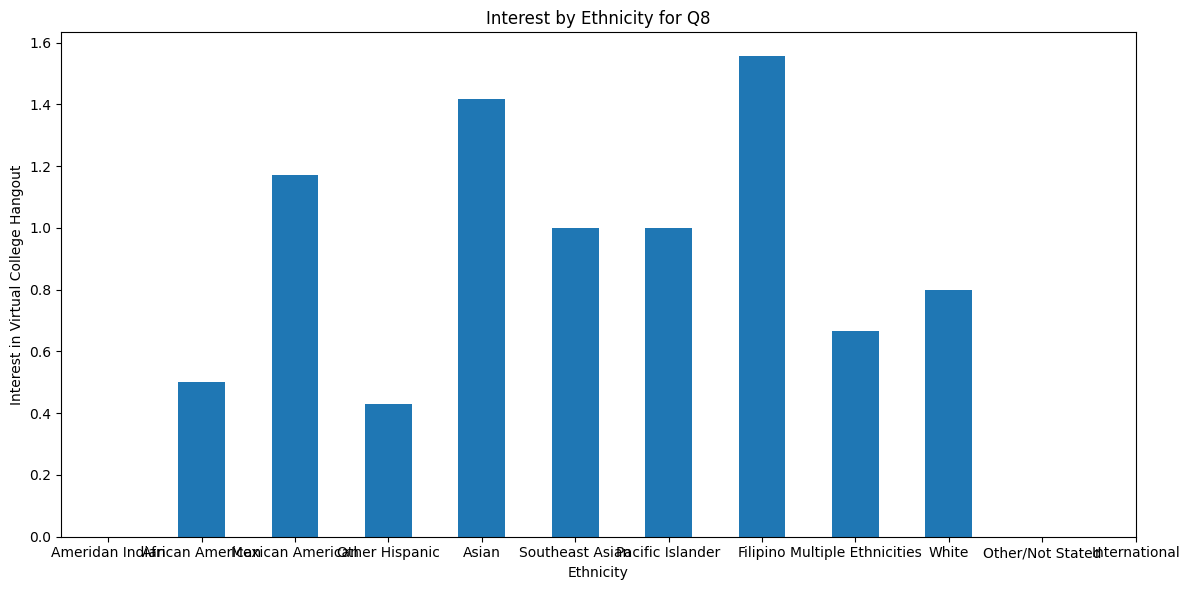

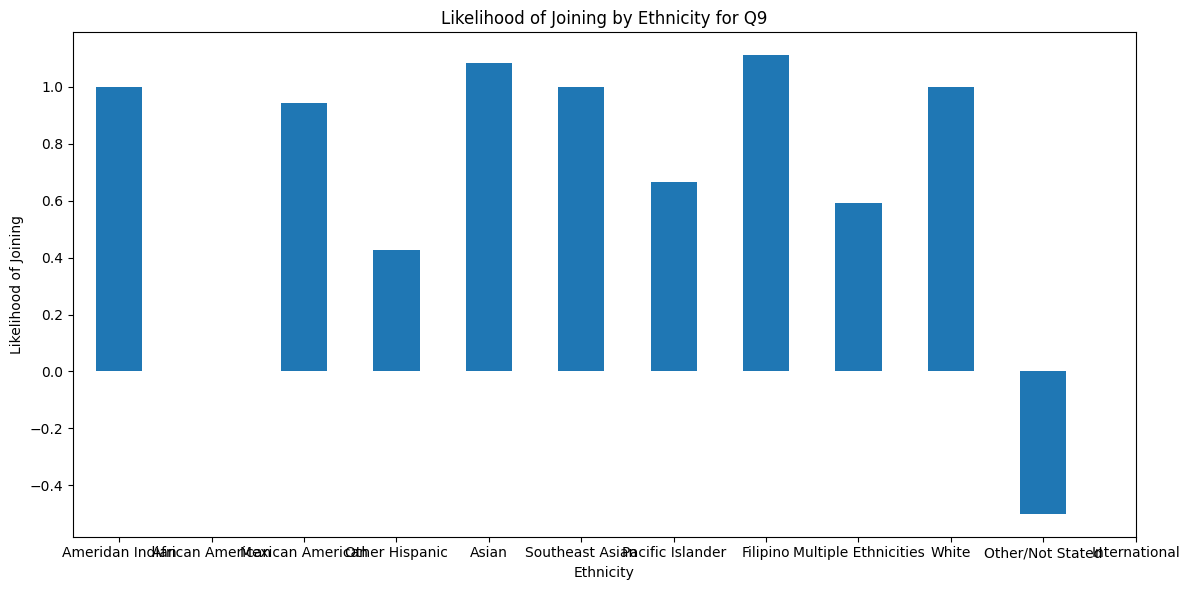

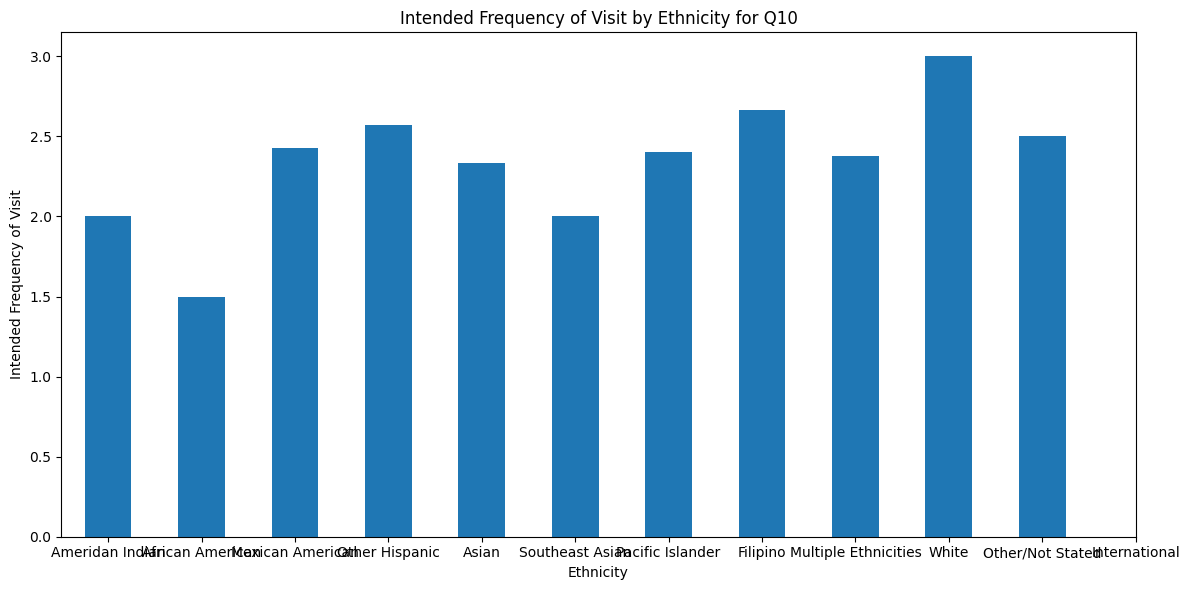

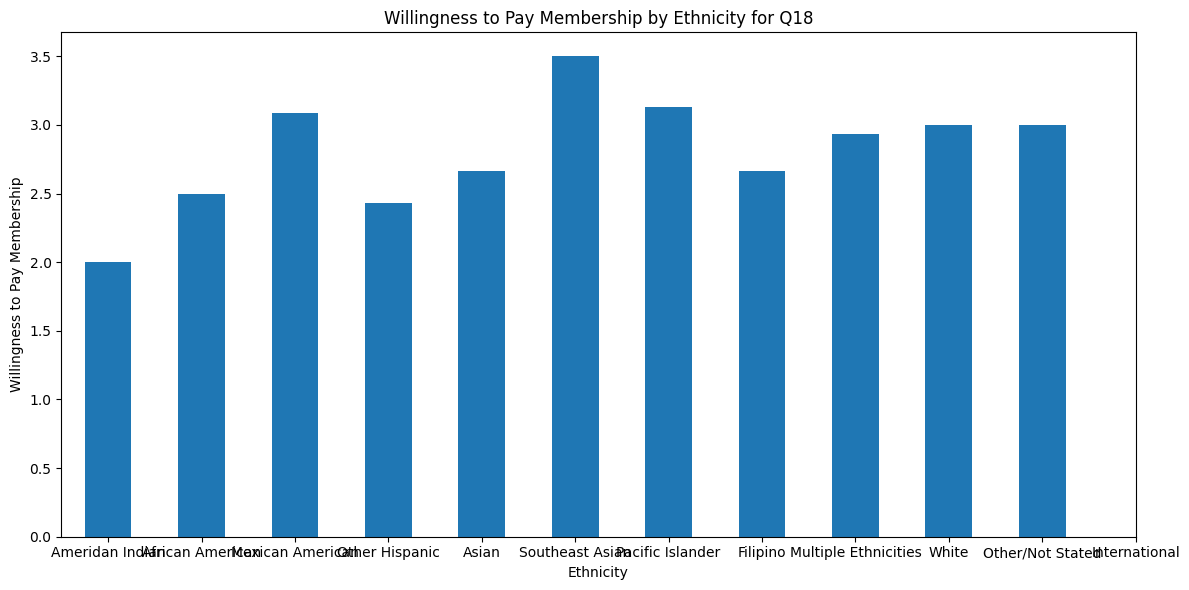


Income Level Differences:


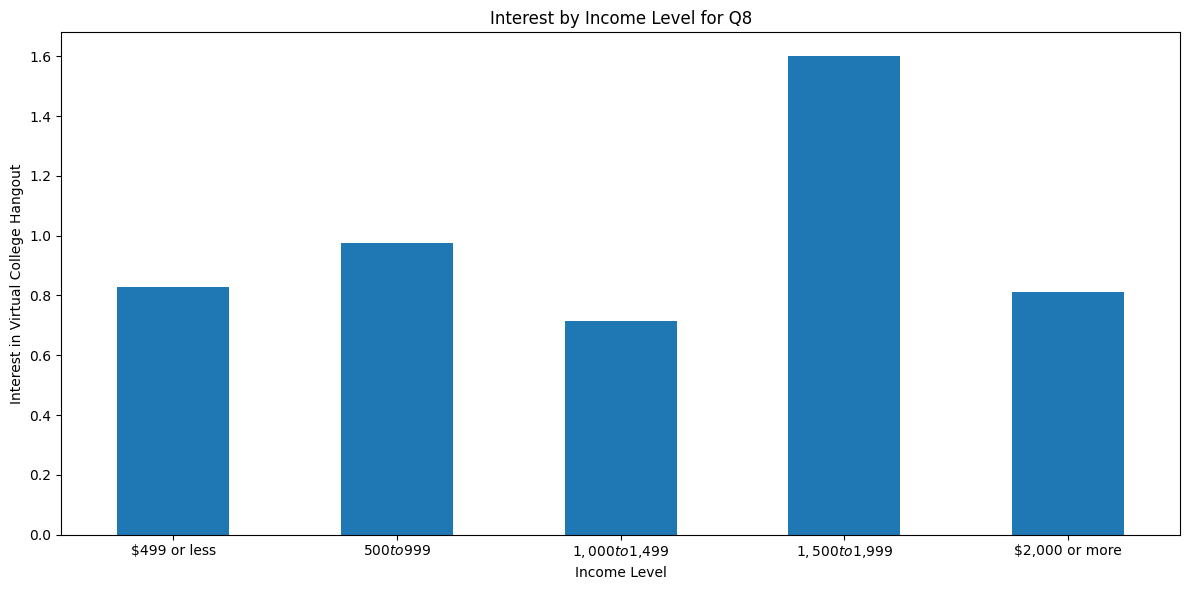

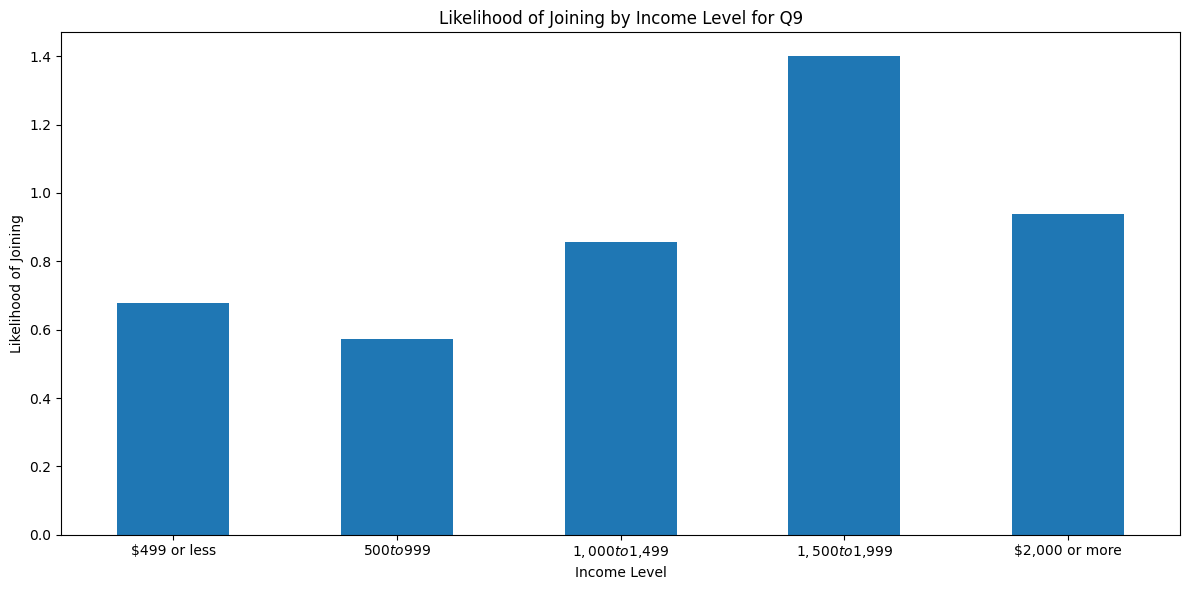

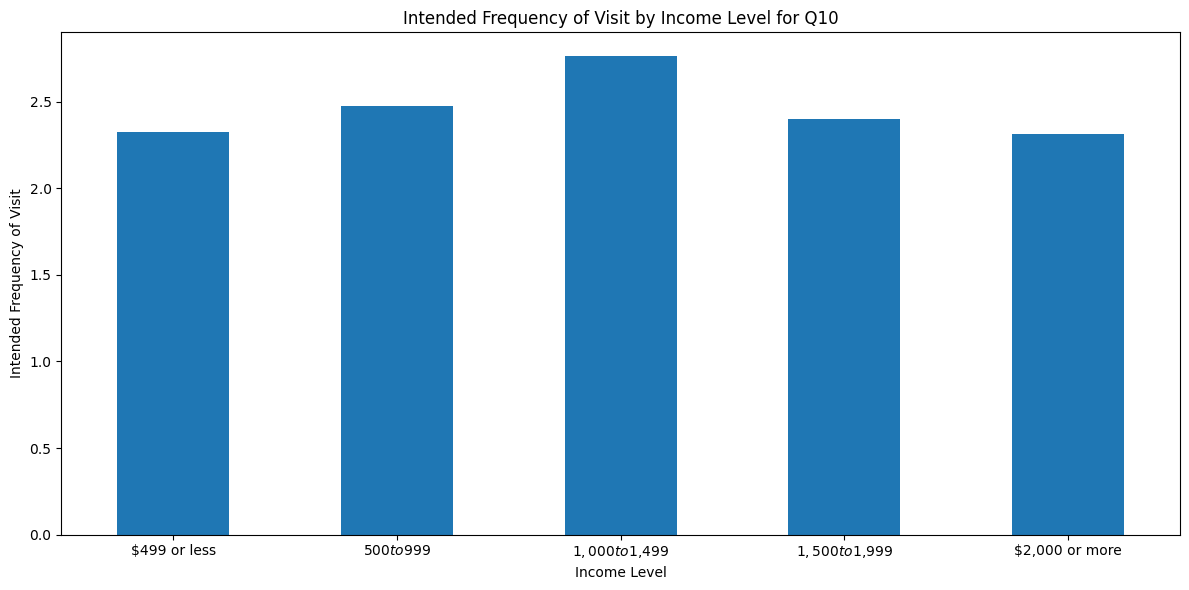

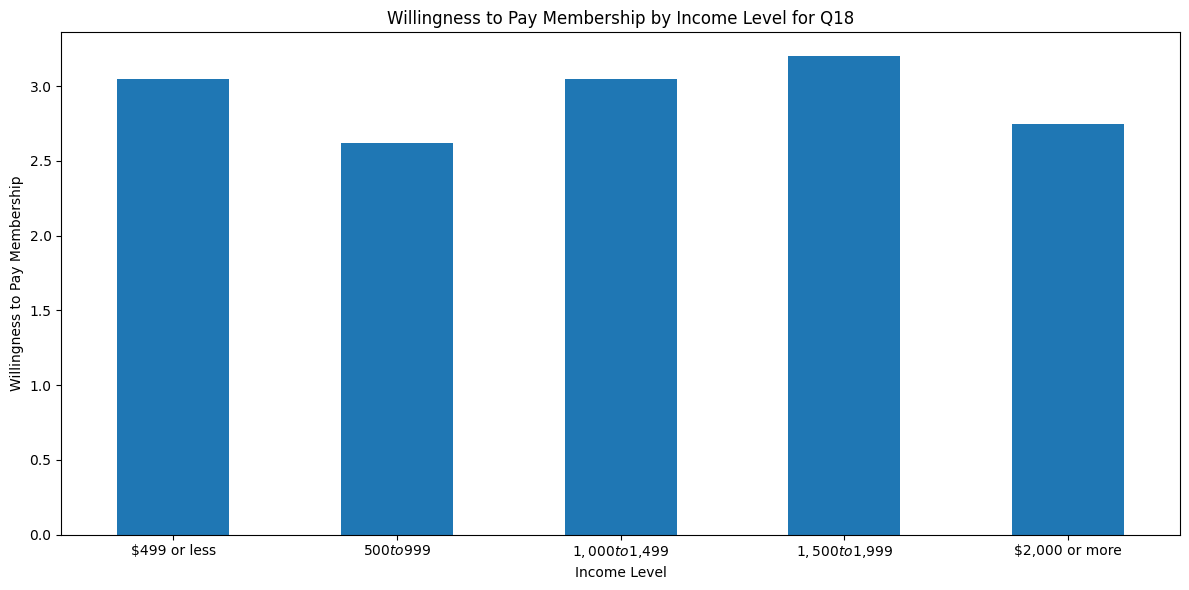

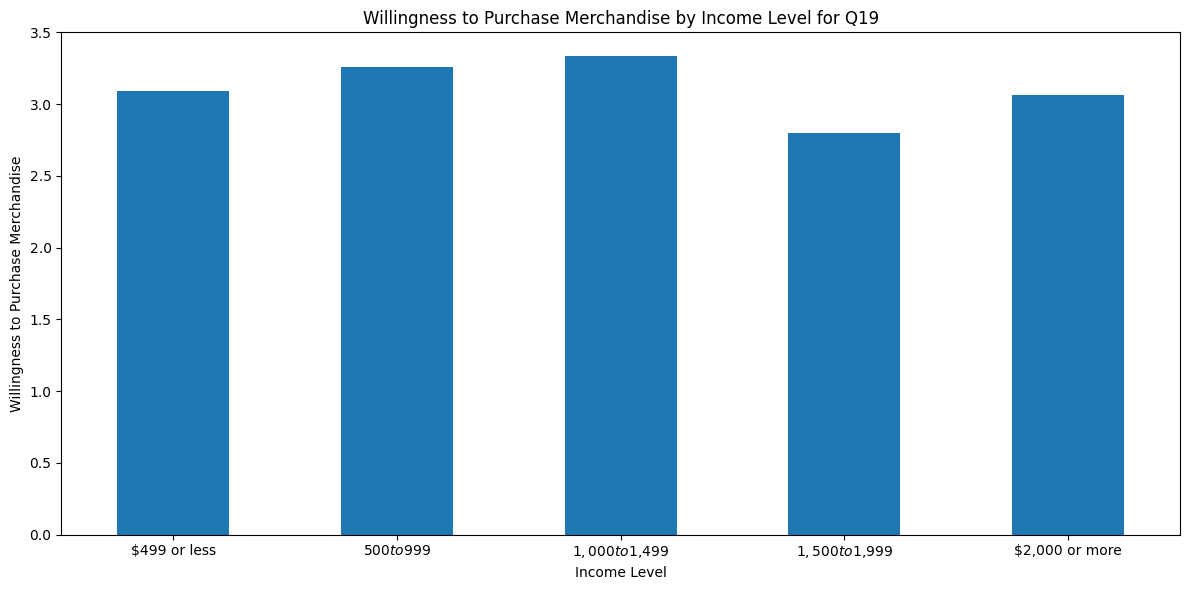

In [94]:
# Gender labels
gender_labels = {1: 'Male', 2: 'Female'}

# Ethnicity labels
ethnicity_labels = {1: 'Ameridan Indian', 2: 'African American', 3: 'Mexican American', 4: 'Other Hispanic',
                    5: 'Asian', 6: 'Southeast Asian', 7: 'Pacific Islander', 8: 'Filipino',
                    9: 'Multiple Ethnicities', 10: 'White', 11: 'Other/Not Stated', 12: 'International'}

# Income level labels
income_labels = {1: '$499 or less', 2: '$500 to $999', 3: '$1,000 to $1,499', 4: '$1,500 to $1,999', 5: '$2,000 or more'}

# Function to create bar charts for a given variable and grouping
def plot_bars(variable, groupby, x_label, y_label, title, labels):
    group_stats = data.groupby(groupby)[variable].mean()
    group_stats.plot(kind='bar', figsize=(12, 6), rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(range(len(labels)), list(labels.values()))
    plt.tight_layout()
    plt.show()

# Gender differences
print("Gender Differences:")
plot_bars('Q8', 'Q1', 'Gender', 'Interest in Virtual College Hangout', 'Interest by Gender for Q8', gender_labels)
plot_bars('Q9', 'Q1', 'Gender', 'Likelihood of Joining', 'Likelihood of Joining by Gender for Q9', gender_labels)
plot_bars('Q10', 'Q1', 'Gender', 'Intended Frequency of Visit', 'Intended Frequency of Visit by Gender for Q10', gender_labels)
plot_bars('Q18', 'Q1', 'Gender', 'Willingness to Pay Membership', 'Willingness to Pay Membership by Gender for Q18', gender_labels)

# Ethnicity differences
print("\nEthnicity Differences:")
plot_bars('Q8', 'Q4', 'Ethnicity', 'Interest in Virtual College Hangout', 'Interest by Ethnicity for Q8', ethnicity_labels)
plot_bars('Q9', 'Q4', 'Ethnicity', 'Likelihood of Joining', 'Likelihood of Joining by Ethnicity for Q9', ethnicity_labels)
plot_bars('Q10', 'Q4', 'Ethnicity', 'Intended Frequency of Visit', 'Intended Frequency of Visit by Ethnicity for Q10', ethnicity_labels)
plot_bars('Q18', 'Q4', 'Ethnicity', 'Willingness to Pay Membership', 'Willingness to Pay Membership by Ethnicity for Q18', ethnicity_labels)

# Income level differences
print("\nIncome Level Differences:")
plot_bars('Q8', 'Q7', 'Income Level', 'Interest in Virtual College Hangout', 'Interest by Income Level for Q8', income_labels)
plot_bars('Q9', 'Q7', 'Income Level', 'Likelihood of Joining', 'Likelihood of Joining by Income Level for Q9', income_labels)
plot_bars('Q10', 'Q7', 'Income Level', 'Intended Frequency of Visit', 'Intended Frequency of Visit by Income Level for Q10', income_labels)
plot_bars('Q18', 'Q7', 'Income Level', 'Willingness to Pay Membership', 'Willingness to Pay Membership by Income Level for Q18', income_labels)
plot_bars('Q19', 'Q7', 'Income Level', 'Willingness to Purchase Merchandise', 'Willingness to Purchase Merchandise by Income Level for Q19', income_labels)


In [95]:
# Data Reporting:
# Based on your analyses, answer these questions:
# What are some key differences based on gender regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?

# Interest in the Product/Service (Q8):
# Male respondents show slightly higher interest in the virtual college hangout compared to female respondents.
# Likelihood of Joining or Using the Product/Service (Q9):
# The likelihood of joining is somewhat lower for female respondents as compared to male respondents.
# Intended Frequency of Visit/Use (Q10):
# Male respondents intend to visit or use the service less frequently than female respondents.
# Willingness to Pay Membership (Q18):
# Male respondents exhibit a lower willingness to pay for membership in comparison to female respondents.



In [96]:
# What are some key differences based on ethnicity regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?

#Interest in the product:
# Filipino and Asian shows higher interest rate
# Ameridan Indian, International shows low interest rate

#Likelihood of joining
# Filipino, Asian and white shows higher likelihood
# African American, International and others shows low level of likelihood

#Frequency Visit
# white, Filipino shows high level of frequency of visits

# Willingness to pay membership
# southeast Asian and Pacific Islander have high level of willingness to pay for membership


In [97]:
# What are some key differences based on target customer income level categories regarding the interest in, likelihood of using, intended frequency of use, and amount will to pay for your client's proposed product or service?

# Interest by Income Level (Q8):
# Respondents with monthly incomes of $1,500 to $1,999 show the highest interest in the virtual college hangout.
# Those earning $1,000 to 1,499 have the least interest.
# Likelihood of Joining by Income Level (Q9):
# The likelihood of joining is highest for individuals earning $1,500 to $1,999.
# Respondents with the lowest income ($500 to 999) seem to be least likely to join.
# Intended Frequency of Visit by Income Level (Q10):
# Respondents across all income levels appear to have a relatively uniform intention of visit frequency, with those earning $1,000 to $1,499 having a marginally higher frequency than others.
# There is not a significant variation across income levels.
# Willingness to Pay Membership by Income Level (Q18):
# The willingness to pay for membership is highest among those with an income of $1,500 to $1,999.
# Interestingly, the willingness decreases at higher income levels, with those earning $2,000 or more showing the least willingness to pay for membership.
# Willingness to Purchase Merchandise by Income Level (Q19):
# The willingness to purchase merchandise follows a similar trend to willingness to pay for membership, with individuals earning $1,000 to $1,499 being the most willing.
# Based on your analyses, provide written data insights to summarize what you found for each of your D6 variables.

In [98]:
# EXTREME WARNING: Do not remove any content from this required IPYNB template. If you suspect that you have accidentally removed original content from this IPYNB file, get a fresh copy from the appropriate MCIS5163 PP Course Blackboard Space for your section of the course.

In [99]:
"""
# EXTREME WARNING: Before you submit your IPYNB file component of your PP TCP, carefully review your submission to:
# 1) Ensure that your code works from within a fresh session of the JupyterLite web-based IDE (https://jupyter.org/try-jupyter/lab/) based on your raw and unedited assigned Use Case datasets; 
# 2) Ensure that you have provided complete answers for each of the required Objectives questions as stated above for each set of ORs.
# 3) Ensure that you have provided sufficient visual evidence for each of the required Requirements statements as stated above for each set of ORs.
# 4) Ensure that you have provided the required number of DVs as stated above in the instructions sections for each set of ORs.
"""

'\n# EXTREME WARNING: Before you submit your IPYNB file component of your PP TCP, carefully review your submission to:\n# 1) Ensure that your code works from within a fresh session of the JupyterLite web-based IDE (https://jupyter.org/try-jupyter/lab/) based on your raw and unedited assigned Use Case datasets; \n# 2) Ensure that you have provided complete answers for each of the required Objectives questions as stated above for each set of ORs.\n# 3) Ensure that you have provided sufficient visual evidence for each of the required Requirements statements as stated above for each set of ORs.\n# 4) Ensure that you have provided the required number of DVs as stated above in the instructions sections for each set of ORs.\n'

In [100]:
# Space intentionally blank to separate sections.

In [101]:
# End of file